In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

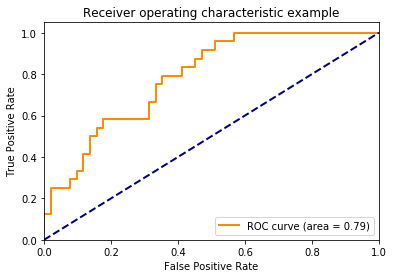

In [3]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [1]:
from utils_processing.utils import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 4000)
print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


Walking Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.036556,0.208514,0.013916,-0.313109,0.011038,0.000231,0.048828,1511792577945,1511792573982,0
1,-0.520783,0.213194,0.013000,0.055925,0.013849,-0.000087,-0.044678,1511792579927,1511792576142,0
2,0.995854,0.213196,0.024170,-0.020581,0.015962,-0.000256,0.129395,1511792581913,1511792578124,0
3,-0.585793,0.213197,0.008545,0.170060,0.007535,-0.000193,-0.035156,1511792583883,1511792580102,0
4,-0.190467,0.213194,0.019653,-0.677261,0.014081,-0.000197,-0.001953,1511792585868,1511792582082,0


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
770,-0.009983,0.169028,0.018524,-1.272247,0.010811,0.000095,0.045349,1515342449697,1515342445810,0
771,-0.354395,0.179601,0.017181,-0.859266,0.010758,0.000051,-0.040344,1515342451689,1515342447810,0
772,-0.017769,0.176774,0.011093,-0.771254,0.007258,0.000082,-0.001404,1515342453687,1515342449798,0
773,0.069523,0.229413,0.011353,-1.199488,0.006437,0.000206,-0.002747,1515342454085,1515342451892,0
774,0.595170,0.577350,0.000610,-1.500000,0.000527,-0.000014,0.000732,1515342454085,1515342453787,0


Stairs Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.058054,0.277353,0.249268,-1.535585,0.125822,-0.002033,-0.144531,1511794109427,1511794107260,1
1,-0.151656,0.208513,0.105469,-1.211670,0.058574,-0.000976,0.111816,1511794137676,1511794133719,1
2,0.534511,0.213185,0.064880,-0.810616,0.045345,-0.000892,0.221191,1511794139657,1511794135876,1
3,-0.196613,0.267249,0.040527,-1.106622,0.024263,-0.000451,-0.028564,1511794140197,1511794137856,1
4,-0.628156,0.577345,0.007202,-1.500000,0.006294,-0.000122,-0.009521,1511794140197,1511794139837,1


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,0.001324,0.199988,0.056396,-1.182624,0.034936,-0.000909,0.142822,1517762563863,1517762559977,1
741,0.107538,0.213190,0.042786,-1.107888,0.032259,-0.000713,-0.069397,1517762565868,1517762561963,1
742,0.219983,0.213192,0.039963,-0.738128,0.026036,-0.000767,0.052124,1517762567757,1517762563968,1
743,-0.010833,0.242525,0.031555,-0.879498,0.021997,-0.000523,0.007629,1517762569158,1517762566168,1
744,-0.414442,0.377957,0.016846,-1.095433,0.011272,-0.000177,0.003906,1517762569158,1517762567956,1


Stairs Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-1.021262,0.208516,0.037598,0.237436,0.030651,0.000760,-0.211426,1511794298414,1511794294448,2
1,0.652077,0.213192,0.051331,-0.475024,0.029038,0.000753,0.103271,1511794300387,1511794296608,2
2,0.456631,0.267249,0.053101,-0.996965,0.032449,0.000467,0.087402,1511794300931,1511794298587,2
3,-0.544685,0.577343,0.010742,-1.500000,0.009162,0.000138,-0.011230,1511794300931,1511794300568,2
4,0.096934,0.208513,0.116089,-1.513954,0.056793,0.000901,0.145508,1511794326369,1511794322409,2


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
738,0.019617,0.176760,0.073837,-1.001644,0.048400,0.001456,-0.091736,1517762681357,1517762677467,2
739,-0.101159,0.171484,0.084885,-1.291928,0.050027,0.001269,-0.056335,1517762683363,1517762679382,2
740,-1.132433,0.174068,0.035278,-0.176283,0.021962,0.000473,-0.362427,1517762685252,1517762681471,2
741,1.092082,0.182571,0.008972,0.004800,0.011127,0.000167,0.107971,1517762686754,1517762683458,2
742,0.154986,0.267256,0.021561,-1.413095,0.011880,0.000230,0.033691,1517762686754,1517762685367,2


Escalator Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.111658,0.160127,0.044830,-1.694003,0.022932,-0.000751,0.359558,1513098440657,1513098436667,3
1,-0.694840,0.158105,0.049561,-1.024056,0.026298,-0.001122,-0.437561,1513098442659,1513098438681,3
2,-0.429678,0.164381,0.094055,-1.185356,0.059720,-0.001941,-0.778259,1513098444663,1513098440761,3
3,0.373051,0.185678,0.085938,-0.860375,0.054594,-0.001766,0.074341,1513098446648,1513098442755,3
4,0.026722,0.242524,0.042725,-1.192100,0.028435,-0.000657,-0.205994,1513098448438,1513098444751,3


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
754,-0.556474,0.166654,0.069519,-1.150075,0.041812,-0.001040,-0.461914,1517591983695,1517591979821,3
755,0.747235,0.162214,0.062927,-0.628924,0.036944,-0.001189,0.341858,1517591985692,1517591981817,3
756,-0.463315,0.166656,0.039749,-0.532260,0.025756,-0.000752,-0.127197,1517591987664,1517591983793,3
757,-0.197195,0.196105,0.061676,-1.386538,0.037001,-0.000948,-0.214783,1517591989051,1517591985781,3
758,0.548370,0.316223,0.020721,-1.152427,0.013463,-0.000386,0.029541,1517591989051,1517591987762,3


Escalator Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.019180,0.208513,0.056763,-1.590601,0.029714,0.000290,0.100098,1512574184873,1512574180915,4
1,0.110041,0.213192,0.033752,-0.699422,0.021052,0.000555,0.038818,1512574186852,1512574183074,4
2,0.185690,0.213190,0.076416,-1.622025,0.037445,0.000596,0.135010,1512574188831,1512574185053,4
3,0.198471,0.213186,0.048096,-0.763740,0.036341,0.000665,0.234863,1512574190813,1512574187033,4
4,-0.116592,0.213185,0.056274,-0.761194,0.041617,0.000851,-0.035889,1512574192806,1512574189011,4


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,-0.796692,0.188974,0.027695,-0.662534,0.019125,0.000398,-0.143005,1517739881737,1517739878361,4
741,0.391562,0.160122,0.046936,-1.235477,0.028000,0.000834,0.320068,1517739883824,1517739879851,4
742,-0.968870,0.156165,0.024780,0.099513,0.020205,0.000756,-0.278381,1517739885806,1517739881835,4
743,0.684228,0.179602,0.026947,-1.001605,0.016305,0.000325,0.162842,1517739886917,1517739883940,4
744,-0.727842,0.301505,0.012939,-0.697778,0.009941,0.000333,-0.043091,1517739886917,1517739885909,4


Lift Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.140978,0.164402,0.147278,-1.418297,0.086766,-0.002147,-0.705383,1513240689727,1513240685732,5
1,-0.308936,0.188955,0.115707,-1.024341,0.072746,-0.002507,-0.155457,1513240690732,1513240688032,5
2,0.269731,0.199953,0.364441,-1.654229,0.184969,-0.003248,1.790161,1513240693417,1513240689828,5
3,-0.308360,0.213152,0.204407,-1.116626,0.119425,-0.002847,-0.360291,1513240695498,1513240692008,5
4,-0.635302,0.301443,0.183258,-1.088869,0.117063,-0.001302,-0.567871,1513240697293,1513240694396,5


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
245,-0.506969,0.158121,0.223694,-1.195090,0.129249,-0.003839,-1.641785,1517742600492,1517742596505,5
246,-0.170028,0.162172,0.240494,-0.911133,0.161371,-0.005347,-0.199768,1517742602482,1517742598596,5
247,0.279590,0.160094,0.315247,-1.333981,0.162554,-0.004697,0.819214,1517742604473,1517742600590,5
248,0.747088,0.196101,0.095993,-0.872499,0.067266,-0.002173,0.774292,1517742605069,1517742602580,5
249,0.240351,0.408246,0.010162,-1.641280,0.005865,-0.000181,0.006958,1517742605069,1517742604573,5


Lift Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.013894,0.176778,0.167175,-1.234812,0.095970,0.001914,-0.215088,1513693873478,1513693869500,6
1,0.088861,0.188955,0.167618,-1.354644,0.096944,0.001881,0.206726,1513693875468,1513693871700,6
2,0.022904,0.192419,0.145447,-1.125555,0.095383,0.002131,0.126953,1513693877467,1513693873679,6
3,0.042569,0.192417,0.154724,-1.096245,0.100460,0.002023,-0.138062,1513693879351,1513693875575,6
4,-0.255256,0.188950,0.156021,-1.129477,0.090355,0.002188,-0.327637,1513693881456,1513693877558,6


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
230,0.611912,0.156169,0.175171,-0.961909,0.106114,0.003475,1.181885,1517742579704,1517742575711,6
231,0.052867,0.156135,0.237732,-1.110591,0.143881,0.005178,-0.237305,1517742581698,1517742577712,6
232,-0.120854,0.158075,0.263474,-1.357341,0.148015,0.004713,-0.398499,1517742583689,1517742579805,6
233,-0.425482,0.176747,0.139557,-1.076135,0.078653,0.002686,-0.498840,1517742584879,1517742581802,6
234,-0.268848,0.288667,0.024002,-1.276984,0.016339,0.000476,-0.033203,1517742584879,1517742583793,6


In [4]:
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)

In [2]:
def create_vertical_transition_dataset(walking_frame, vertical_frame):
    v_features_array = vertical_frame.as_matrix(columns=vertical_frame.columns)
    w_features_array = walking_frame.as_matrix(columns=walking_frame.columns)
    X = np.concatenate([w_features_array, v_features_array])
    Y = X[:,10]
    X = X[:,:7]
    return X, Y

In [6]:
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)

In [7]:
X.shape, Y

((4252, 7), array([ 0.,  0.,  0., ...,  1.,  1.,  1.]))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [9]:
classifier = GradientBoostingClassifier()
y_score = classifier.fit(X_train, y_train).predict(X_test)

In [11]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [13]:
print(false_positive_rate, true_positive_rate)

[ 0.          0.14110429  1.        ] [ 0.          0.96511628  1.        ]


In [25]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 5000)
print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)
classifier = GradientBoostingClassifier()
y_score = classifier.fit(X_train, y_train).predict(X_test)
false_positive_rate_52, true_positive_rate_52, thresholds = roc_curve(y_test, y_score)
roc_auc_52 = auc(false_positive_rate_52, true_positive_rate_52)

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


Walking Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.107373,0.188982,0.015076,-0.156572,0.012485,0.000172,0.036621,1511792578841,1511792573982,0
1,-0.121330,0.192445,0.022705,-0.878625,0.015277,-0.000182,-0.138672,1511792580824,1511792576142,0
2,1.162256,0.192446,0.014282,0.662948,0.014559,-0.000063,0.119141,1511792582803,1511792578124,0
3,-0.683964,0.188977,0.013367,0.373061,0.009623,-0.000292,-0.043213,1511792584964,1511792580102,0
4,-0.144504,0.188976,0.019775,-0.742690,0.014611,0.000051,0.001953,1511792586944,1511792582082,0


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
770,-0.037640,0.152496,0.016418,-0.972756,0.009880,0.000081,0.060913,1515342450597,1515342445810,0
771,-0.248094,0.162218,0.016083,-0.803781,0.010232,0.000035,0.009094,1515342452690,1515342447810,0
772,-0.186091,0.169028,0.012207,-0.843892,0.007267,0.000130,-0.021240,1515342454085,1515342449798,0
773,0.069523,0.229413,0.011353,-1.199488,0.006437,0.000206,-0.002747,1515342454085,1515342451892,0
774,0.595170,0.577350,0.000610,-1.500000,0.000527,-0.000014,0.000732,1515342454085,1515342453787,0


Stairs Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.058054,0.277353,0.249268,-1.535585,0.125822,-0.002033,-0.144531,1511794109427,1511794107260,1
1,0.064036,0.188985,0.123108,-1.384959,0.066970,-0.001137,-0.350586,1511794138577,1511794133719,1
2,0.430553,0.199984,0.061768,-0.752603,0.049941,-0.000997,0.099121,1511794140197,1511794135876,1
3,-0.196613,0.267249,0.040527,-1.106622,0.024263,-0.000451,-0.028564,1511794140197,1511794137856,1
4,-0.628156,0.577345,0.007202,-1.500000,0.006294,-0.000122,-0.009521,1511794140197,1511794139837,1


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,-0.047795,0.182560,0.075836,-1.114025,0.042294,-0.000960,-0.008301,1517762564782,1517762559977,1
741,0.272678,0.196106,0.059494,-1.171566,0.034840,-0.000747,0.257141,1517762566876,1517762561963,1
742,0.152853,0.192440,0.052948,-0.903260,0.031186,-0.000860,-0.106018,1517762568764,1517762563968,1
743,-0.010833,0.242525,0.031555,-0.879498,0.021997,-0.000523,0.007629,1517762569158,1517762566168,1
744,-0.414442,0.377957,0.016846,-1.095433,0.011272,-0.000177,0.003906,1517762569158,1517762567956,1


Stairs Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.754598,0.188984,0.035461,0.189830,0.034262,0.000896,-0.202881,1511794299307,1511794294448,2
1,0.747196,0.199989,0.055908,-0.535929,0.039307,0.000766,0.270508,1511794300931,1511794296608,2
2,0.456631,0.267249,0.053101,-0.996965,0.032449,0.000467,0.087402,1511794300931,1511794298587,2
3,-0.544685,0.577343,0.010742,-1.500000,0.009162,0.000138,-0.011230,1511794300931,1511794300568,2
4,-0.137322,0.192450,0.118530,-1.562760,0.061057,0.000980,0.002197,1511794327095,1511794322409,2


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
738,-0.023819,0.158096,0.098297,-1.168045,0.059717,0.001777,0.137024,1517762682254,1517762677467,2
739,-0.415858,0.152483,0.097137,-1.257042,0.053311,0.001143,-0.511597,1517762684359,1517762679382,2
740,-1.226274,0.152489,0.014771,0.574951,0.021933,0.000659,-0.325195,1517762686269,1517762681471,2
741,1.092082,0.182571,0.008972,0.004800,0.011127,0.000167,0.107971,1517762686754,1517762683458,2
742,0.154986,0.267256,0.021561,-1.413095,0.011880,0.000230,0.033691,1517762686754,1517762685367,2


Escalator Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.012907,0.142856,0.047913,-1.053583,0.027685,-0.001302,0.508972,1513098441658,1513098436667,3
1,-1.033353,0.141403,0.062531,0.178219,0.047132,-0.002042,-1.069763,1513098443656,1513098438681,3
2,-0.201755,0.147423,0.128769,-1.429332,0.075527,-0.002313,-1.076355,1513098445549,1513098440761,3
3,0.323838,0.174061,0.078369,-0.875610,0.060281,-0.001800,0.055115,1513098447047,1513098442755,3
4,-0.335066,0.218200,0.050720,-0.838852,0.040145,-0.000656,-0.040833,1513098449634,1513098444751,3


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
755,-0.134905,0.147429,0.106903,-1.574416,0.050771,-0.001374,-0.237122,1517591984684,1517591979821,3
756,0.669952,0.144328,0.046173,-0.401981,0.040912,-0.001472,0.119995,1517591986675,1517591981817,3
757,-0.759050,0.152484,0.045380,-0.426287,0.039962,-0.001210,-0.718445,1517591988654,1517591983793,3
758,-0.197195,0.196105,0.061676,-1.386538,0.037001,-0.000948,-0.214783,1517591989051,1517591985781,3
759,0.548370,0.316223,0.020721,-1.152427,0.013463,-0.000386,0.029541,1517591989051,1517591987762,3


Escalator Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.113943,0.188984,0.066345,-1.464870,0.034294,0.000420,-0.265381,1512574185772,1512574180915,4
1,0.791335,0.192440,0.038940,0.010388,0.034286,0.000809,0.145020,1512574187753,1512574183074,4
2,0.008915,0.188970,0.080261,-1.376055,0.043899,0.000847,-0.291260,1512574189913,1512574185053,4
3,0.018883,0.188966,0.072510,-1.139584,0.044193,0.000908,0.387939,1512574191891,1512574187033,4
4,-0.078098,0.188964,0.075562,-0.973332,0.051720,0.001026,0.311279,1512574193872,1512574189011,4


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
741,-0.021824,0.160119,0.027252,-0.484672,0.027263,0.000778,-0.097778,1517739882830,1517739878361,4
742,0.006243,0.142850,0.061646,-1.562571,0.032072,0.000751,-0.295105,1517739884821,1517739879851,4
743,-0.312604,0.140019,0.028198,-0.119372,0.025393,0.001094,-0.148010,1517739886802,1517739881835,4
744,0.684228,0.179602,0.026947,-1.001605,0.016305,0.000325,0.162842,1517739886917,1517739883940,4
745,-0.727842,0.301505,0.012939,-0.697778,0.009941,0.000333,-0.043091,1517739886917,1517739885909,4


Lift Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.194864,0.145866,0.198425,-1.174880,0.116570,-0.003402,-0.177551,1513240690732,1513240685732,5
1,-0.941582,0.166603,0.171600,-0.549411,0.177508,-0.003775,-2.518860,1513240692712,1513240688032,5
2,0.229627,0.192387,0.375702,-1.447795,0.198044,-0.003324,1.649231,1513240694695,1513240689828,5
3,-0.533129,0.204058,0.220764,-0.707004,0.145900,-0.003001,-0.811401,1513240696402,1513240692008,5
4,-0.641487,0.277257,0.266724,-0.962146,0.166869,-0.001568,-0.959900,1513240698386,1513240694396,5


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
245,-0.281551,0.141425,0.325516,-1.397991,0.169246,-0.005056,-1.368408,1517742601484,1517742596505,5
246,-0.083111,0.144284,0.369080,-1.196672,0.205542,-0.006803,-1.172546,1517742603479,1517742598596,5
247,0.438073,0.149040,0.327759,-1.244850,0.169539,-0.005006,1.192383,1517742605069,1517742600590,5
248,0.747088,0.196101,0.095993,-0.872499,0.067266,-0.002173,0.774292,1517742605069,1517742602580,5
249,0.240351,0.408246,0.010162,-1.641280,0.005865,-0.000181,0.006958,1517742605069,1517742604573,5


Lift Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.089463,0.162221,0.192184,-1.112721,0.118123,0.002376,0.152405,1513693874470,1513693869500,6
1,0.062211,0.168999,0.190430,-1.253495,0.121794,0.002610,-0.059875,1513693876468,1513693871700,6
2,0.015479,0.171463,0.189423,-1.181054,0.120256,0.002610,0.154480,1513693878451,1513693873679,6
3,-0.074938,0.168994,0.228973,-1.249953,0.125236,0.002711,-0.206299,1513693880344,1513693875575,6
4,-0.043742,0.171463,0.165344,-0.983914,0.112503,0.002773,0.007874,1513693882330,1513693877558,6


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
230,0.366239,0.140023,0.279114,-1.327727,0.142021,0.004634,1.615112,1517742580702,1517742575711,6
231,0.092553,0.139984,0.309357,-1.172061,0.185556,0.006397,1.173462,1517742582693,1517742577712,6
232,-0.297539,0.141379,0.300934,-1.299878,0.167001,0.005158,-1.733459,1517742584691,1517742579805,6
233,-0.425482,0.176747,0.139557,-1.076135,0.078653,0.002686,-0.498840,1517742584879,1517742581802,6
234,-0.268848,0.288667,0.024002,-1.276984,0.016339,0.000476,-0.033203,1517742584879,1517742583793,6


In [28]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 3000)
print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)
classifier = GradientBoostingClassifier()
y_score = classifier.fit(X_train, y_train).predict(X_test)
false_positive_rate_32, true_positive_rate_32, thresholds = roc_curve(y_test, y_score)
roc_auc_32 = auc(false_positive_rate_32, true_positive_rate_32)

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


Walking Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.364018,0.242535,0.009277,-0.189912,0.011714,0.000190,0.012939,1511792576861,1511792573982,0
1,0.568013,0.249996,0.010315,0.161080,0.008722,-0.000015,0.016846,1511792578841,1511792576142,0
2,0.581438,0.249994,0.026611,-0.768585,0.016952,-0.000215,0.111572,1511792580824,1511792578124,0
3,-0.068305,0.249997,0.006287,-0.050100,0.005488,0.000050,0.008057,1511792582803,1511792580102,0
4,-0.180126,0.242530,0.016357,-0.469171,0.011181,-0.000280,0.024902,1511792584964,1511792582082,0


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
770,0.358700,0.192447,0.013367,-0.850988,0.009455,0.000203,0.053955,1515342448702,1515342445810,0
771,-0.182348,0.208511,0.012085,-1.005436,0.007170,0.000096,-0.031067,1515342450597,1515342447810,0
772,-0.359201,0.208511,0.012360,-0.841769,0.007892,-0.000048,-0.062073,1515342452690,1515342449798,0
773,0.069523,0.229413,0.011353,-1.199488,0.006437,0.000206,-0.002747,1515342454085,1515342451892,0
774,0.595170,0.577350,0.000610,-1.500000,0.000527,-0.000014,0.000732,1515342454085,1515342453787,0


Stairs Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.058054,0.277353,0.249268,-1.535585,0.125822,-0.002033,-0.144531,1511794109427,1511794107260,1
1,-0.021023,0.242536,0.068848,-1.274597,0.039374,-0.000748,-0.012207,1511794136597,1511794133719,1
2,0.534500,0.249987,0.061096,-1.170361,0.038667,-0.000678,0.201660,1511794138577,1511794135876,1
3,-0.196613,0.267249,0.040527,-1.106622,0.024263,-0.000451,-0.028564,1511794140197,1511794137856,1
4,-0.628156,0.577345,0.007202,-1.500000,0.006294,-0.000122,-0.009521,1511794140197,1511794139837,1


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,-0.050060,0.218206,0.047485,-1.039912,0.029633,-0.000816,0.025879,1517762562870,1517762559977,1
741,0.033768,0.258189,0.029602,-0.892036,0.023666,-0.000449,-0.002380,1517762564782,1517762561963,1
742,0.626952,0.249994,0.029602,-0.534742,0.019266,-0.000493,0.071838,1517762566876,1517762563968,1
743,0.225424,0.258191,0.030090,-1.070753,0.018582,-0.000427,0.050293,1517762568764,1517762566168,1
744,-0.414442,0.377957,0.016846,-1.095433,0.011272,-0.000177,0.003906,1517762569158,1517762567956,1


Stairs Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.780836,0.242538,0.027832,-0.355842,0.030610,0.000705,-0.153809,1511794297327,1511794294448,2
1,0.546673,0.249993,0.024170,-0.412253,0.016311,0.000444,0.083008,1511794299307,1511794296608,2
2,0.456631,0.267249,0.053101,-0.996965,0.032449,0.000467,0.087402,1511794300931,1511794298587,2
3,-0.544685,0.577343,0.010742,-1.500000,0.009162,0.000138,-0.011230,1511794300931,1511794300568,2
4,0.488859,0.242535,0.072266,-0.947777,0.042020,0.000795,0.039307,1511794325288,1511794322409,2


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
738,-0.255750,0.208500,0.059875,-1.156708,0.033903,0.001006,-0.078552,1517762680255,1517762677467,2
739,-0.050040,0.199988,0.064697,-1.432388,0.038134,0.001005,-0.361938,1517762682254,1517762679382,2
740,-0.778166,0.196106,0.037567,-0.891704,0.023503,0.000452,-0.337830,1517762684359,1517762681471,2
741,1.355599,0.196114,0.006989,1.555399,0.007436,0.000094,0.051086,1517762686269,1517762683458,2
742,0.154986,0.267256,0.021561,-1.413095,0.011880,0.000230,0.033691,1517762686754,1517762685367,2


Escalator Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.508119,0.185697,0.046814,-1.405184,0.022979,-0.000740,-0.272461,1513098439665,1513098436667,3
1,-1.250177,0.182566,0.012115,1.157499,0.013902,-0.000826,-0.092102,1513098441658,1513098438681,3
2,-0.672531,0.182555,0.051682,-0.302069,0.043481,-0.001634,-0.225769,1513098443656,1513098440761,3
3,0.481221,0.196103,0.072540,-0.948493,0.049786,-0.001579,0.224487,1513098445549,1513098442755,3
4,0.038013,0.249990,0.041275,-1.208614,0.026730,-0.000644,-0.147217,1513098447047,1513098444751,3


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
754,-0.782717,0.192439,0.033173,-0.678154,0.024434,-0.000654,-0.210754,1517591982711,1517591979821,3
755,0.558972,0.188972,0.049149,-0.951892,0.034000,-0.001177,0.424683,1517591984684,1517591981817,3
756,-0.207918,0.182567,0.018738,-0.648123,0.019083,-0.000572,0.010071,1517591986675,1517591983793,3
757,-0.409859,0.208501,0.049896,-1.068364,0.033700,-0.000952,-0.276672,1517591988654,1517591985781,3
758,0.548370,0.316223,0.020721,-1.152427,0.013463,-0.000386,0.029541,1517591989051,1517591987762,3


Escalator Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.481425,0.242534,0.040771,-1.236192,0.023707,0.000188,0.102539,1512574183791,1512574180915,4
1,-0.097270,0.249992,0.023560,-0.843564,0.015287,0.000359,0.000732,1512574185772,1512574183074,4
2,0.932454,0.249992,0.033203,-0.283547,0.028248,0.000564,0.209473,1512574187753,1512574185053,4
3,-0.181840,0.242523,0.015137,0.122702,0.024838,0.000599,-0.033203,1512574189913,1512574187033,4
4,-0.483354,0.242521,0.039551,-0.859315,0.031913,0.000614,-0.200928,1512574191891,1512574189011,4


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,-0.345245,0.229407,0.039825,-1.369553,0.020550,0.000444,-0.057861,1517739880747,1517739878361,4
741,0.769231,0.185691,0.024475,-0.716187,0.019099,0.000427,0.177490,1517739882830,1517739879851,4
742,-0.679500,0.179596,0.028442,-0.475106,0.020704,0.000696,-0.031738,1517739884821,1517739881835,4
743,0.753316,0.182571,0.023911,-0.848529,0.015556,0.000311,0.133179,1517739886802,1517739883940,4
744,-0.727842,0.301505,0.012939,-0.697778,0.009941,0.000333,-0.043091,1517739886917,1517739885909,4


Lift Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.387580,0.192453,0.129303,-1.245659,0.061335,-0.001448,-0.397766,1513240688726,1513240685732,5
1,-0.308936,0.188955,0.115707,-1.024341,0.072746,-0.002507,-0.155457,1513240690732,1513240688032,5
2,-0.214895,0.235646,0.303680,-1.739119,0.159985,-0.002507,-1.643188,1513240692712,1513240689828,5
3,-0.399848,0.242492,0.106567,-0.376364,0.083115,-0.002076,0.058105,1513240694695,1513240692008,5
4,-0.821879,0.333284,0.081787,-0.777421,0.078186,-0.000980,-0.230286,1513240696402,1513240694396,5


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
244,-0.789389,0.182580,0.126694,-0.687198,0.078914,-0.002380,-0.920044,1517742599489,1517742596505,5
245,0.187259,0.185660,0.179688,-1.151005,0.112710,-0.003779,0.395142,1517742601484,1517742598596,5
246,0.061654,0.185653,0.235535,-1.399429,0.135463,-0.004261,0.727661,1517742603479,1517742600590,5
247,0.747088,0.196101,0.095993,-0.872499,0.067266,-0.002173,0.774292,1517742605069,1517742602580,5
248,0.240351,0.408246,0.010162,-1.641280,0.005865,-0.000181,0.006958,1517742605069,1517742604573,5


Lift Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.060558,0.204127,0.141144,-1.463507,0.071506,0.001286,-0.293030,1513693872382,1513693869500,6
1,0.207749,0.218196,0.126099,-1.150566,0.070205,0.001513,0.170471,1513693874470,1513693871700,6
2,0.008298,0.223580,0.101227,-0.910497,0.070014,0.001538,-0.001831,1513693876468,1513693873679,6
3,-0.063039,0.218190,0.102051,-1.135674,0.076253,0.001642,-0.153137,1513693878451,1513693875575,6
4,-0.228488,0.218189,0.126221,-1.232004,0.073248,0.001685,-0.140869,1513693880344,1513693877558,6


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
229,0.663200,0.179601,0.099365,-0.878878,0.060901,0.002167,0.671021,1517742578702,1517742575711,6
230,-0.089714,0.179573,0.189240,-1.328742,0.105531,0.003703,-0.176819,1517742580702,1517742577712,6
231,0.047448,0.182541,0.218063,-1.391321,0.118257,0.003720,0.001831,1517742582693,1517742579805,6
232,-0.377366,0.182545,0.134308,-1.103698,0.076680,0.002684,-0.452637,1517742584691,1517742581802,6
233,-0.268848,0.288667,0.024002,-1.276984,0.016339,0.000476,-0.033203,1517742584879,1517742583793,6


In [30]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 6000)
print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)
classifier = GradientBoostingClassifier()
y_score = classifier.fit(X_train, y_train).predict(X_test)
false_positive_rate_62, true_positive_rate_62, thresholds = roc_curve(y_test, y_score)
roc_auc_62 = auc(false_positive_rate_62, true_positive_rate_62)

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


Walking Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.052303,0.171498,0.016724,-0.305358,0.013455,0.000100,0.058838,1511792579927,1511792573982,0
1,0.197017,0.174073,0.025879,-1.058291,0.015870,-0.000223,-0.021484,1511792581913,1511792576142,0
2,1.074605,0.174073,0.013184,0.915671,0.015037,-0.000306,0.084473,1511792583883,1511792578124,0
3,-0.737887,0.174072,0.017090,-0.101323,0.012902,-0.000209,-0.102295,1511792585868,1511792580102,0
4,-0.149230,0.174071,0.020996,-0.675992,0.015746,-0.000082,0.027344,1511792587844,1511792582082,0


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
770,0.115772,0.140025,0.016052,-0.999123,0.010435,0.000037,0.018066,1515342451689,1515342445810,0
771,0.105754,0.145862,0.015442,-0.955080,0.010155,0.000166,0.010681,1515342453687,1515342447810,0
772,-0.186091,0.169028,0.012207,-0.843892,0.007267,0.000130,-0.021240,1515342454085,1515342449798,0
773,0.069523,0.229413,0.011353,-1.199488,0.006437,0.000206,-0.002747,1515342454085,1515342451892,0
774,0.595170,0.577350,0.000610,-1.500000,0.000527,-0.000014,0.000732,1515342454085,1515342453787,0


Stairs Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.058054,0.277353,0.249268,-1.535585,0.125822,-0.002033,-0.144531,1511794109427,1511794107260,1
1,0.198903,0.171497,0.125916,-1.337646,0.075751,-0.001351,0.376465,1511794139657,1511794133719,1
2,0.430553,0.199984,0.061768,-0.752603,0.049941,-0.000997,0.099121,1511794140197,1511794135876,1
3,-0.196613,0.267249,0.040527,-1.106622,0.024263,-0.000451,-0.028564,1511794140197,1511794137856,1
4,-0.628156,0.577345,0.007202,-1.500000,0.006294,-0.000122,-0.009521,1511794140197,1511794139837,1


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,-0.012264,0.164384,0.095825,-1.193312,0.051828,-0.001225,-0.151550,1517762565868,1517762559977,1
741,0.222689,0.176765,0.067429,-1.077128,0.041245,-0.001022,0.043884,1517762567757,1517762561963,1
742,0.040893,0.185683,0.054382,-0.863580,0.034185,-0.000956,-0.103516,1517762569158,1517762563968,1
743,-0.010833,0.242525,0.031555,-0.879498,0.021997,-0.000523,0.007629,1517762569158,1517762566168,1
744,-0.414442,0.377957,0.016846,-1.095433,0.011272,-0.000177,0.003906,1517762569158,1517762567956,1


Stairs Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.161733,0.171498,0.045776,-0.108549,0.043272,0.001205,0.063721,1511794300387,1511794294448,2
1,0.747196,0.199989,0.055908,-0.535929,0.039307,0.000766,0.270508,1511794300931,1511794296608,2
2,0.456631,0.267249,0.053101,-0.996965,0.032449,0.000467,0.087402,1511794300931,1511794298587,2
3,-0.544685,0.577343,0.010742,-1.500000,0.009162,0.000138,-0.011230,1511794300931,1511794300568,2
4,-0.137322,0.192450,0.118530,-1.562760,0.061057,0.000980,0.002197,1511794327095,1511794322409,2


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
738,-0.049980,0.142837,0.124512,-1.211271,0.072111,0.002041,0.417664,1517762683363,1517762677467,2
739,-0.646535,0.141406,0.077393,-1.050905,0.052928,0.001163,-0.650818,1517762685252,1517762679382,2
740,-0.964085,0.145856,0.014069,0.499287,0.023487,0.000732,-0.204895,1517762686754,1517762681471,2
741,1.092082,0.182571,0.008972,0.004800,0.011127,0.000167,0.107971,1517762686754,1517762683458,2
742,0.154986,0.267256,0.021561,-1.413095,0.011880,0.000230,0.033691,1517762686754,1517762685367,2


Escalator Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.272784,0.130189,0.054718,-0.907333,0.037413,-0.001598,0.006958,1513098442659,1513098436667,3
1,-0.855899,0.132434,0.081970,-0.609755,0.064156,-0.002350,-1.072083,1513098444663,1513098438681,3
2,-0.180512,0.142836,0.137390,-1.394936,0.081169,-0.002500,-0.930725,1513098446648,1513098440761,3
3,0.308144,0.171481,0.075470,-0.877387,0.061784,-0.001813,0.000549,1513098448438,1513098442755,3
4,-0.373271,0.199977,0.095215,-0.815777,0.050585,-0.001007,-0.109619,1513098450433,1513098444751,3


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
755,0.126360,0.133620,0.105728,-1.592477,0.056503,-0.001385,0.254578,1517591985692,1517591979821,3
756,0.452690,0.136071,0.046539,-0.380667,0.045360,-0.001652,0.508606,1517591987664,1517591981817,3
757,-0.640450,0.147429,0.061218,-0.825569,0.044319,-0.001206,-0.748596,1517591989051,1517591983793,3
758,-0.197195,0.196105,0.061676,-1.386538,0.037001,-0.000948,-0.214783,1517591989051,1517591985781,3
759,0.548370,0.316223,0.020721,-1.152427,0.013463,-0.000386,0.029541,1517591989051,1517591987762,3


Escalator Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.167016,0.171500,0.071777,-1.268843,0.039398,0.000616,-0.212891,1512574186852,1512574180915,4
1,0.445027,0.174066,0.072998,-1.168146,0.045275,0.000841,0.374756,1512574188831,1512574183074,4
2,0.117719,0.174063,0.085449,-1.168915,0.054080,0.000913,-0.489746,1512574190813,1512574185053,4
3,0.133841,0.174060,0.079102,-1.044540,0.054355,0.001145,-0.097412,1512574192806,1512574187033,4
4,-0.059054,0.174058,0.093262,-1.052655,0.060357,0.001246,0.074219,1512574194774,1512574189011,4


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
741,0.088716,0.142847,0.053650,-0.863601,0.035365,0.001185,0.330444,1517739883824,1517739878361,4
742,-0.287910,0.130182,0.066437,-1.513460,0.033084,0.000811,-0.467407,1517739885806,1517739879851,4
743,-0.274520,0.138666,0.028931,-0.175650,0.025978,0.001109,-0.122498,1517739886917,1517739881835,4
744,0.684228,0.179602,0.026947,-1.001605,0.016305,0.000325,0.162842,1517739886917,1517739883940,4
745,-0.727842,0.301505,0.012939,-0.697778,0.009941,0.000333,-0.043091,1517739886917,1517739885909,4


Lift Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.194864,0.145866,0.198425,-1.174880,0.116570,-0.003402,-0.177551,1513240690732,1513240685732,5
1,-0.507088,0.152439,0.422302,-1.401020,0.222870,-0.004517,-4.097534,1513240693417,1513240688032,5
2,0.230159,0.176711,0.391190,-1.257978,0.225416,-0.004095,1.650513,1513240695498,1513240689828,5
3,-0.676360,0.196035,0.238770,-0.531474,0.177435,-0.003323,-1.620239,1513240697293,1513240692008,5
4,-0.641487,0.277257,0.266724,-0.962146,0.166869,-0.001568,-0.959900,1513240698386,1513240694396,5


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
245,-0.346897,0.130192,0.388245,-1.128737,0.217156,-0.006623,-1.372070,1517742602482,1517742596505,5
246,0.055106,0.131260,0.407837,-1.328933,0.239313,-0.007240,-1.217773,1517742604473,1517742598596,5
247,0.438073,0.149040,0.327759,-1.244850,0.169539,-0.005006,1.192383,1517742605069,1517742600590,5
248,0.747088,0.196101,0.095993,-0.872499,0.067266,-0.002173,0.774292,1517742605069,1517742602580,5
249,0.240351,0.408246,0.010162,-1.641280,0.005865,-0.000181,0.006958,1517742605069,1517742604573,5


Lift Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.114870,0.149069,0.225769,-1.173218,0.144638,0.002743,0.786560,1513693875468,1513693869500,6
1,0.048279,0.154268,0.255890,-1.239004,0.147253,0.003204,-0.404297,1513693877467,1513693871700,6
2,0.058249,0.158075,0.245605,-1.149344,0.144038,0.002991,-0.086548,1513693879351,1513693873679,6
3,-0.145433,0.154263,0.240524,-1.250716,0.144022,0.003214,-0.026489,1513693881456,1513693875575,6
4,-0.094196,0.150716,0.229599,-1.176010,0.141636,0.003481,0.075317,1513693883434,1513693877558,6


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
231,0.338285,0.128033,0.320740,-1.221759,0.183090,0.006109,1.751587,1517742581698,1517742575711,6
232,0.011785,0.127988,0.393555,-1.274890,0.219208,0.007389,0.919067,1517742583689,1517742577712,6
233,-0.334926,0.138633,0.305283,-1.281222,0.169547,0.005160,-1.768127,1517742584879,1517742579805,6
234,-0.425482,0.176747,0.139557,-1.076135,0.078653,0.002686,-0.498840,1517742584879,1517742581802,6
235,-0.268848,0.288667,0.024002,-1.276984,0.016339,0.000476,-0.033203,1517742584879,1517742583793,6


In [32]:
skf = StratifiedKFold(10)
fpr62 = []
tpr62 = []
auc62 = []
for train, test in skf.split(X,Y):
        XTrain, XTest, YTrain, YTest = X[train], X[test], Y[train], Y[test]
        classifier = GradientBoostingClassifier()
        y_score = classifier.fit(XTrain, YTrain).predict(XTest)
        false_positive_rate_62, true_positive_rate_62, thresholds = roc_curve(YTest, y_score)
        roc_auc_62 = auc(false_positive_rate_62, true_positive_rate_62)
        fpr62.append(false_positive_rate_62)
        tpr62.append(true_positive_rate_62)
        auc62.append(roc_auc_62)
print(fpr62, tpr62, auc62)
#         acc, f1, prec, recall = classify(XTrain, XTest, YTrain, YTest)

[array([ 0.        ,  0.16666667,  1.        ]), array([ 0.        ,  0.24358974,  1.        ]), array([ 0.        ,  0.28205128,  1.        ]), array([ 0.        ,  0.32051282,  1.        ]), array([ 0.        ,  0.14102564,  1.        ]), array([ 0.        ,  0.35064935,  1.        ]), array([ 0.       ,  0.1038961,  1.       ]), array([ 0.        ,  0.02597403,  1.        ]), array([ 0.        ,  0.12987013,  1.        ]), array([ 0.        ,  0.09090909,  1.        ])] [array([ 0.        ,  0.99425287,  1.        ]), array([ 0.        ,  0.99712644,  1.        ]), array([ 0.        ,  0.98850575,  1.        ]), array([ 0.        ,  0.99425287,  1.        ]), array([ 0.        ,  0.97701149,  1.        ]), array([ 0.        ,  0.93965517,  1.        ]), array([ 0.        ,  0.93678161,  1.        ]), array([ 0.        ,  0.95402299,  1.        ]), array([ 0.        ,  0.95977011,  1.        ]), array([ 0.        ,  0.97988506,  1.        ])] [0.9137931034482758, 0.87676834659593283,

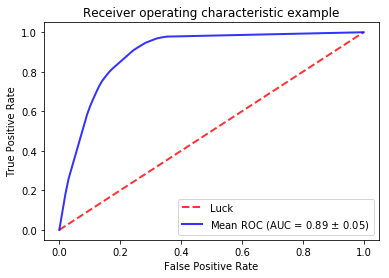

In [41]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
skf = StratifiedKFold(10)
classifier = GradientBoostingClassifier()
i = 0
for train, test in skf.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                  label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
# plt.legend()
plt.legend(loc="lower right")
plt.show()

In [3]:
def compute_roc_params(X, Y, classifier):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    skf = StratifiedKFold(10)
#     classifier = GradientBoostingClassifier()
    i = 0
    for train, test in skf.split(X, Y):
        probas_ = classifier.fit(X[train], Y[train]).predict(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(Y[test], probas_)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    #     plt.plot(fpr, tpr, lw=1, alpha=0.3,
    #              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
#     plt.plot(mean_fpr, mean_tpr, color='b',
#              label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#              lw=2, alpha=.8)

#     std_tpr = np.std(tprs, axis=0)
#     tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#     tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    # plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
    #                  label=r'$\pm$ 1 std. dev.')

#     plt.xlim([-0.05, 1.05])
#     plt.ylim([-0.05, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     # plt.legend()
#     plt.legend(loc="lower right")
#     plt.show()
    return mean_fpr, mean_tpr, mean_auc, std_auc

In [4]:
def plot_roc(mean_fpr, mean_tpr, mean_auc, std_auc, string):
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    plt.plot(mean_fpr, mean_tpr, color='b',
                 label=r'Mean ROC(%s) (AUC = %0.2f $\pm$ %0.2f)' % (string, mean_auc, std_auc),
                 lw=2, alpha=.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    # plt.legend()
    plt.legend(loc="lower right")
    plt.show()

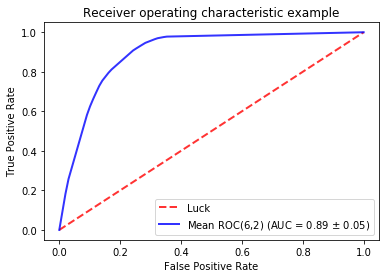

In [48]:
mean_fpr62, mean_tpr62, mean_auc62, std_auc62 = compute_roc_params(X,Y,GradientBoostingClassifier())
plot_roc(mean_fpr62, mean_tpr62, mean_auc62, std_auc62, '6,2')
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Luck', alpha=.8)
# plt.plot(mean_fpr62, mean_tpr62, color='b',
#              label=r'Mean ROC(6,2) (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc62, std_auc62),
#              lw=2, alpha=.8)

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# # plt.legend()
# plt.legend(loc="lower right")
# plt.show()

In [6]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 5000)
print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)
classifier = GradientBoostingClassifier()
mean_fpr52, mean_tpr52, mean_auc52, std_auc52 = compute_roc_params(X,Y,classifier)
plot_roc(mean_fpr52, mean_tpr52, mean_auc52, std_auc52, '5,2')
# y_score = classifier.fit(X_train, y_train).predict(X_test)
# false_positive_rate_52, true_positive_rate_52, thresholds = roc_curve(y_test, y_score)
# roc_auc_52 = auc(false_positive_rate_52, true_positive_rate_52)

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


Walking Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.107373,0.188982,0.015076,-0.156572,0.012485,0.000172,0.036621,1511792578841,1511792573982,0
1,-0.121330,0.192445,0.022705,-0.878625,0.015277,-0.000182,-0.138672,1511792580824,1511792576142,0
2,1.162256,0.192446,0.014282,0.662948,0.014559,-0.000063,0.119141,1511792582803,1511792578124,0
3,-0.683964,0.188977,0.013367,0.373061,0.009623,-0.000292,-0.043213,1511792584964,1511792580102,0
4,-0.144504,0.188976,0.019775,-0.742690,0.014611,0.000051,0.001953,1511792586944,1511792582082,0


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
770,-0.037640,0.152496,0.016418,-0.972756,0.009880,0.000081,0.060913,1515342450597,1515342445810,0
771,-0.248094,0.162218,0.016083,-0.803781,0.010232,0.000035,0.009094,1515342452690,1515342447810,0
772,-0.186091,0.169028,0.012207,-0.843892,0.007267,0.000130,-0.021240,1515342454085,1515342449798,0
773,0.069523,0.229413,0.011353,-1.199488,0.006437,0.000206,-0.002747,1515342454085,1515342451892,0
774,0.595170,0.577350,0.000610,-1.500000,0.000527,-0.000014,0.000732,1515342454085,1515342453787,0


Stairs Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.058054,0.277353,0.249268,-1.535585,0.125822,-0.002033,-0.144531,1511794109427,1511794107260,1
1,0.064036,0.188985,0.123108,-1.384959,0.066970,-0.001137,-0.350586,1511794138577,1511794133719,1
2,0.430553,0.199984,0.061768,-0.752603,0.049941,-0.000997,0.099121,1511794140197,1511794135876,1
3,-0.196613,0.267249,0.040527,-1.106622,0.024263,-0.000451,-0.028564,1511794140197,1511794137856,1
4,-0.628156,0.577345,0.007202,-1.500000,0.006294,-0.000122,-0.009521,1511794140197,1511794139837,1


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,-0.047795,0.182560,0.075836,-1.114025,0.042294,-0.000960,-0.008301,1517762564782,1517762559977,1
741,0.272678,0.196106,0.059494,-1.171566,0.034840,-0.000747,0.257141,1517762566876,1517762561963,1
742,0.152853,0.192440,0.052948,-0.903260,0.031186,-0.000860,-0.106018,1517762568764,1517762563968,1
743,-0.010833,0.242525,0.031555,-0.879498,0.021997,-0.000523,0.007629,1517762569158,1517762566168,1
744,-0.414442,0.377957,0.016846,-1.095433,0.011272,-0.000177,0.003906,1517762569158,1517762567956,1


Stairs Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.754598,0.188984,0.035461,0.189830,0.034262,0.000896,-0.202881,1511794299307,1511794294448,2
1,0.747196,0.199989,0.055908,-0.535929,0.039307,0.000766,0.270508,1511794300931,1511794296608,2
2,0.456631,0.267249,0.053101,-0.996965,0.032449,0.000467,0.087402,1511794300931,1511794298587,2
3,-0.544685,0.577343,0.010742,-1.500000,0.009162,0.000138,-0.011230,1511794300931,1511794300568,2
4,-0.137322,0.192450,0.118530,-1.562760,0.061057,0.000980,0.002197,1511794327095,1511794322409,2


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
738,-0.023819,0.158096,0.098297,-1.168045,0.059717,0.001777,0.137024,1517762682254,1517762677467,2
739,-0.415858,0.152483,0.097137,-1.257042,0.053311,0.001143,-0.511597,1517762684359,1517762679382,2
740,-1.226274,0.152489,0.014771,0.574951,0.021933,0.000659,-0.325195,1517762686269,1517762681471,2
741,1.092082,0.182571,0.008972,0.004800,0.011127,0.000167,0.107971,1517762686754,1517762683458,2
742,0.154986,0.267256,0.021561,-1.413095,0.011880,0.000230,0.033691,1517762686754,1517762685367,2


Escalator Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.012907,0.142856,0.047913,-1.053583,0.027685,-0.001302,0.508972,1513098441658,1513098436667,3
1,-1.033353,0.141403,0.062531,0.178219,0.047132,-0.002042,-1.069763,1513098443656,1513098438681,3
2,-0.201755,0.147423,0.128769,-1.429332,0.075527,-0.002313,-1.076355,1513098445549,1513098440761,3
3,0.323838,0.174061,0.078369,-0.875610,0.060281,-0.001800,0.055115,1513098447047,1513098442755,3
4,-0.335066,0.218200,0.050720,-0.838852,0.040145,-0.000656,-0.040833,1513098449634,1513098444751,3


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
755,-0.134905,0.147429,0.106903,-1.574416,0.050771,-0.001374,-0.237122,1517591984684,1517591979821,3
756,0.669952,0.144328,0.046173,-0.401981,0.040912,-0.001472,0.119995,1517591986675,1517591981817,3
757,-0.759050,0.152484,0.045380,-0.426287,0.039962,-0.001210,-0.718445,1517591988654,1517591983793,3
758,-0.197195,0.196105,0.061676,-1.386538,0.037001,-0.000948,-0.214783,1517591989051,1517591985781,3
759,0.548370,0.316223,0.020721,-1.152427,0.013463,-0.000386,0.029541,1517591989051,1517591987762,3


Escalator Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.113943,0.188984,0.066345,-1.464870,0.034294,0.000420,-0.265381,1512574185772,1512574180915,4
1,0.791335,0.192440,0.038940,0.010388,0.034286,0.000809,0.145020,1512574187753,1512574183074,4
2,0.008915,0.188970,0.080261,-1.376055,0.043899,0.000847,-0.291260,1512574189913,1512574185053,4
3,0.018883,0.188966,0.072510,-1.139584,0.044193,0.000908,0.387939,1512574191891,1512574187033,4
4,-0.078098,0.188964,0.075562,-0.973332,0.051720,0.001026,0.311279,1512574193872,1512574189011,4


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
741,-0.021824,0.160119,0.027252,-0.484672,0.027263,0.000778,-0.097778,1517739882830,1517739878361,4
742,0.006243,0.142850,0.061646,-1.562571,0.032072,0.000751,-0.295105,1517739884821,1517739879851,4
743,-0.312604,0.140019,0.028198,-0.119372,0.025393,0.001094,-0.148010,1517739886802,1517739881835,4
744,0.684228,0.179602,0.026947,-1.001605,0.016305,0.000325,0.162842,1517739886917,1517739883940,4
745,-0.727842,0.301505,0.012939,-0.697778,0.009941,0.000333,-0.043091,1517739886917,1517739885909,4


Lift Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.194864,0.145866,0.198425,-1.174880,0.116570,-0.003402,-0.177551,1513240690732,1513240685732,5
1,-0.941582,0.166603,0.171600,-0.549411,0.177508,-0.003775,-2.518860,1513240692712,1513240688032,5
2,0.229627,0.192387,0.375702,-1.447795,0.198044,-0.003324,1.649231,1513240694695,1513240689828,5
3,-0.533129,0.204058,0.220764,-0.707004,0.145900,-0.003001,-0.811401,1513240696402,1513240692008,5
4,-0.641487,0.277257,0.266724,-0.962146,0.166869,-0.001568,-0.959900,1513240698386,1513240694396,5


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
245,-0.281551,0.141425,0.325516,-1.397991,0.169246,-0.005056,-1.368408,1517742601484,1517742596505,5
246,-0.083111,0.144284,0.369080,-1.196672,0.205542,-0.006803,-1.172546,1517742603479,1517742598596,5
247,0.438073,0.149040,0.327759,-1.244850,0.169539,-0.005006,1.192383,1517742605069,1517742600590,5
248,0.747088,0.196101,0.095993,-0.872499,0.067266,-0.002173,0.774292,1517742605069,1517742602580,5
249,0.240351,0.408246,0.010162,-1.641280,0.005865,-0.000181,0.006958,1517742605069,1517742604573,5


Lift Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.089463,0.162221,0.192184,-1.112721,0.118123,0.002376,0.152405,1513693874470,1513693869500,6
1,0.062211,0.168999,0.190430,-1.253495,0.121794,0.002610,-0.059875,1513693876468,1513693871700,6
2,0.015479,0.171463,0.189423,-1.181054,0.120256,0.002610,0.154480,1513693878451,1513693873679,6
3,-0.074938,0.168994,0.228973,-1.249953,0.125236,0.002711,-0.206299,1513693880344,1513693875575,6
4,-0.043742,0.171463,0.165344,-0.983914,0.112503,0.002773,0.007874,1513693882330,1513693877558,6


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
230,0.366239,0.140023,0.279114,-1.327727,0.142021,0.004634,1.615112,1517742580702,1517742575711,6
231,0.092553,0.139984,0.309357,-1.172061,0.185556,0.006397,1.173462,1517742582693,1517742577712,6
232,-0.297539,0.141379,0.300934,-1.299878,0.167001,0.005158,-1.733459,1517742584691,1517742579805,6
233,-0.425482,0.176747,0.139557,-1.076135,0.078653,0.002686,-0.498840,1517742584879,1517742581802,6
234,-0.268848,0.288667,0.024002,-1.276984,0.016339,0.000476,-0.033203,1517742584879,1517742583793,6


NameError: name 'mean_fpr62' is not defined

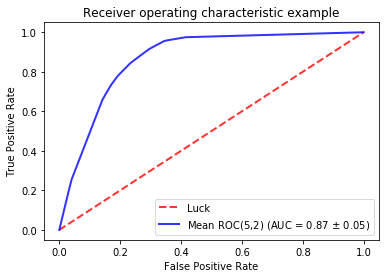

In [7]:
plot_roc(mean_fpr52, mean_tpr52, mean_auc52, std_auc52, '5,2')

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


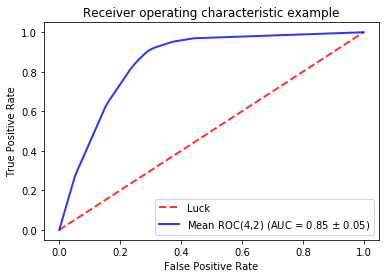

In [8]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 4000)
# print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)
classifier = GradientBoostingClassifier()
mean_fpr42, mean_tpr42, mean_auc42, std_auc42 = compute_roc_params(X,Y,classifier)
plot_roc(mean_fpr42, mean_tpr42, mean_auc42, std_auc42, '4,2')

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


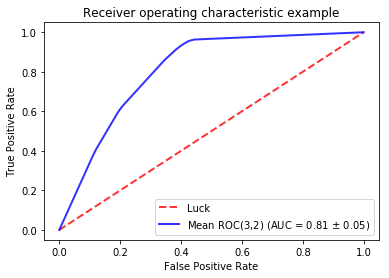

In [9]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 3000)
# print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)
classifier = GradientBoostingClassifier()
mean_fpr32, mean_tpr32, mean_auc32, std_auc32 = compute_roc_params(X,Y,classifier)
plot_roc(mean_fpr32, mean_tpr32, mean_auc32, std_auc32, '3,2')

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


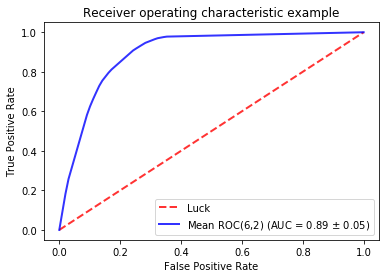

In [10]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 6000)
# print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)
classifier = GradientBoostingClassifier()
mean_fpr62, mean_tpr62, mean_auc62, std_auc62 = compute_roc_params(X,Y,classifier)
plot_roc(mean_fpr62, mean_tpr62, mean_auc62, std_auc62, '6,2')

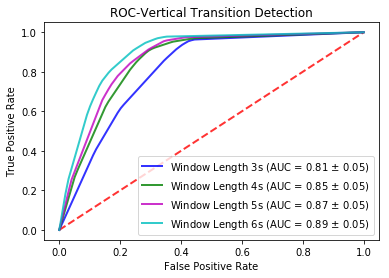

In [63]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             alpha=.8)
plt.plot(mean_fpr32, mean_tpr32, color='b',
             label=r'Window Length 3s (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc32, std_auc32),
             lw=2, alpha=.8)
plt.plot(mean_fpr42, mean_tpr42, color='g',
             label=r'Window Length 4s (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc42, std_auc42),
             lw=2, alpha=.8)
plt.plot(mean_fpr52, mean_tpr52, color='m',
             label=r'Window Length 5s (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc52, std_auc52),
             lw=2, alpha=.8)
plt.plot(mean_fpr62, mean_tpr62, color='c',
             label=r'Window Length 6s (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc62, std_auc62),
             lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Vertical Transition Detection')
# plt.legend()
plt.legend(loc="lower right")
plt.show()

In [13]:
def create_dataset_vertical_2(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame):
    s_frame = pd.concat([lu_frame, ld_frame])
    s_frame['label_v1'] = 0
    o_frame = pd.concat([eu_frame, ed_frame, su_frame, sd_frame])
    o_frame['label_v1'] = 1
    return s_frame, o_frame

In [14]:
def create_dataset_direction(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame):
    u_frame = pd.concat([su_frame, eu_frame, lu_frame])
    u_frame['label_direction'] = 0
    d_frame = pd.concat([sd_frame, ed_frame, ld_frame])
    d_frame['label_direction'] = 1
    return u_frame, d_frame

In [15]:
def create_vertical_v2_dataset(s_frame, m_frame):
    s_features_array = s_frame.as_matrix(columns=s_frame.columns)
    m_features_array = m_frame.as_matrix(columns=m_frame.columns)
    X = np.concatenate([s_features_array, m_features_array])
    Y = X[:,10]
    X = X[:,:7]
    return X, Y

In [16]:
def create_direction_dataset(up_frame, down_frame):
    u_features_array = up_frame.as_matrix(columns=up_frame.columns)
    d_features_array = down_frame.as_matrix(columns=down_frame.columns)
    X = np.concatenate([u_features_array, d_features_array])
    Y = X[:,10]
    X = X[:,:7]
    return X, Y

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


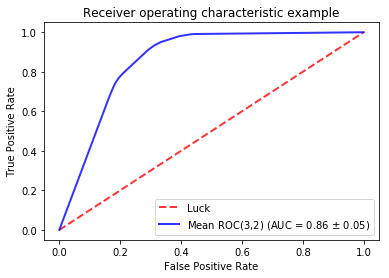

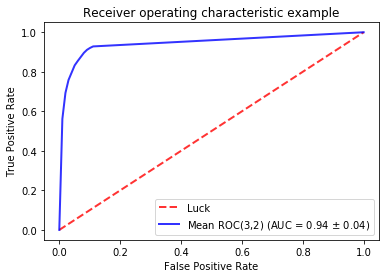

In [17]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 3000)
# print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_2(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_v2_dataset(walking_frame, vertical_frame)
up_frame, down_frame = create_dataset_direction(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X1, Y1 = create_direction_dataset(up_frame, down_frame)
cl1 = AdaBoostClassifier()
cl2 = LogisticRegressionCV(solver = 'liblinear')
emean_fpr32, emean_tpr32, emean_auc32, estd_auc32 = compute_roc_params(X,Y,cl1)
plot_roc(emean_fpr32, emean_tpr32, emean_auc32, estd_auc32, '3,2')
dmean_fpr32, dmean_tpr32, dmean_auc32, dstd_auc32 = compute_roc_params(X1,Y1,cl2)
plot_roc(dmean_fpr32, dmean_tpr32, dmean_auc32, dstd_auc32, '3,2')

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


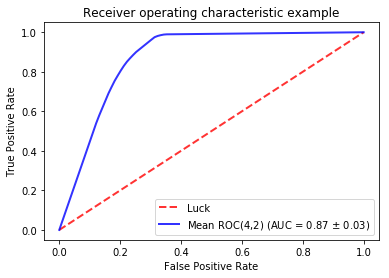

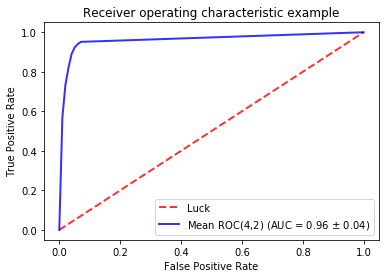

In [18]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 4000)
# print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_2(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_v2_dataset(walking_frame, vertical_frame)
up_frame, down_frame = create_dataset_direction(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X1, Y1 = create_direction_dataset(up_frame, down_frame)
cl1 = AdaBoostClassifier()
cl2 = LogisticRegressionCV(solver = 'liblinear')
emean_fpr42, emean_tpr42, emean_auc42, estd_auc42 = compute_roc_params(X,Y,cl1)
plot_roc(emean_fpr42, emean_tpr42, emean_auc42, estd_auc42, '4,2')
dmean_fpr42, dmean_tpr42, dmean_auc42, dstd_auc42 = compute_roc_params(X1,Y1,cl2)
plot_roc(dmean_fpr42, dmean_tpr42, dmean_auc42, dstd_auc42, '4,2')

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


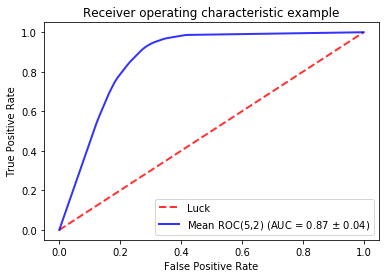

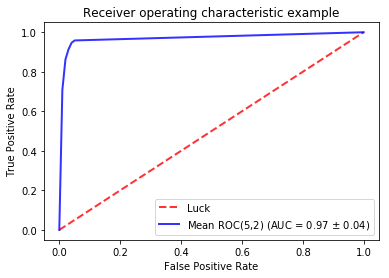

In [19]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 5000)
# print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_2(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_v2_dataset(walking_frame, vertical_frame)
up_frame, down_frame = create_dataset_direction(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X1, Y1 = create_direction_dataset(up_frame, down_frame)
cl1 = AdaBoostClassifier()
cl2 = LogisticRegressionCV(solver = 'liblinear')
emean_fpr52, emean_tpr52, emean_auc52, estd_auc52 = compute_roc_params(X,Y,cl1)
plot_roc(emean_fpr52, emean_tpr52, emean_auc52, estd_auc52, '5,2')
dmean_fpr52, dmean_tpr52, dmean_auc52, dstd_auc52 = compute_roc_params(X1,Y1,cl2)
plot_roc(dmean_fpr52, dmean_tpr52, dmean_auc52, dstd_auc52, '5,2')

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


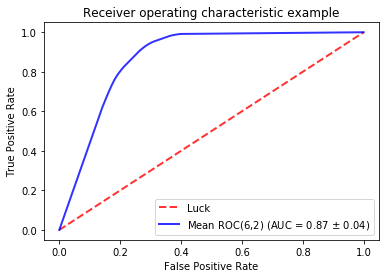

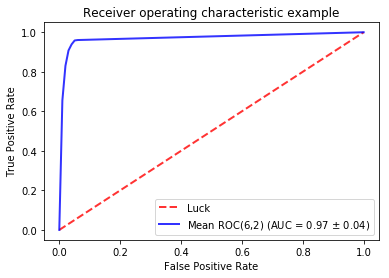

In [20]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 6000)
# print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_2(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_v2_dataset(walking_frame, vertical_frame)
up_frame, down_frame = create_dataset_direction(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X1, Y1 = create_direction_dataset(up_frame, down_frame)
cl1 = AdaBoostClassifier()
cl2 = LogisticRegressionCV(solver = 'liblinear')
emean_fpr62, emean_tpr62, emean_auc62, estd_auc62 = compute_roc_params(X,Y,cl1)
plot_roc(emean_fpr62, emean_tpr62, emean_auc62, estd_auc62, '6,2')
dmean_fpr62, dmean_tpr62, dmean_auc62, dstd_auc62 = compute_roc_params(X1,Y1,cl2)
plot_roc(dmean_fpr62, dmean_tpr62, dmean_auc62, dstd_auc62, '6,2')

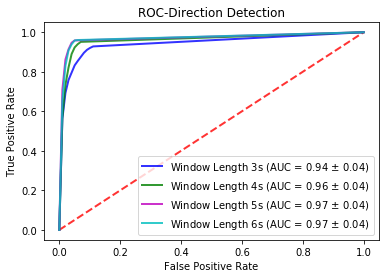

In [64]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             alpha=.8)
plt.plot(dmean_fpr32, dmean_tpr32, color='b',
             label=r'Window Length 3s (AUC = %0.2f $\pm$ %0.2f)' % (dmean_auc32, dstd_auc32),
             lw=2, alpha=.8)
plt.plot(dmean_fpr42, dmean_tpr42, color='g',
             label=r'Window Length 4s (AUC = %0.2f $\pm$ %0.2f)' % (dmean_auc42, dstd_auc42),
             lw=2, alpha=.8)
plt.plot(dmean_fpr52, dmean_tpr52, color='m',
             label=r'Window Length 5s (AUC = %0.2f $\pm$ %0.2f)' % (dmean_auc52, dstd_auc52),
             lw=2, alpha=.8)
plt.plot(dmean_fpr62, dmean_tpr62, color='c',
             label=r'Window Length 6s (AUC = %0.2f $\pm$ %0.2f)' % (dmean_auc62, dstd_auc62),
             lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Direction Detection')
# plt.legend()
plt.legend(loc="lower right")
plt.show()

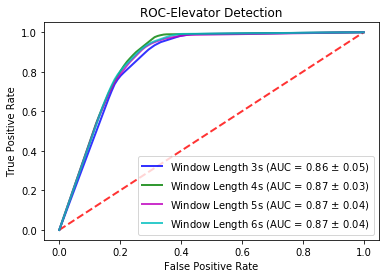

In [65]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             alpha=.8)
plt.plot(emean_fpr32, emean_tpr32, color='b',
             label=r'Window Length 3s (AUC = %0.2f $\pm$ %0.2f)' % (emean_auc32, estd_auc32),
             lw=2, alpha=.8)
plt.plot(emean_fpr42, emean_tpr42, color='g',
             label=r'Window Length 4s (AUC = %0.2f $\pm$ %0.2f)' % (emean_auc42, estd_auc42),
             lw=2, alpha=.8)
plt.plot(emean_fpr52, emean_tpr52, color='m',
             label=r'Window Length 5s (AUC = %0.2f $\pm$ %0.2f)' % (emean_auc52, estd_auc52),
             lw=2, alpha=.8)
plt.plot(emean_fpr62, emean_tpr62, color='c',
             label=r'Window Length 6s (AUC = %0.2f $\pm$ %0.2f)' % (emean_auc62, estd_auc62),
             lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Elevator Detection')
# plt.legend()
plt.legend(loc="lower right")
plt.show()

In [23]:
def create_dataset_esc_stairs(su_frame, sd_frame, eu_frame, ed_frame):
    s_frame = pd.concat([su_frame, sd_frame])
    s_frame['label_es'] = 0
    e_frame = pd.concat([eu_frame, ed_frame])
    e_frame['label_es'] = 1
    return s_frame, e_frame

In [38]:
def create_stairs_esc_dataset(stairs_frame, esc_frame):
    s_features_array = stairs_frame.as_matrix(columns=stairs_frame.columns)
    e_features_array = esc_frame.as_matrix(columns=esc_frame.columns)
    X = np.concatenate([s_features_array, e_features_array])
    Y = X[:,24w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 5000)
print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)]
    X = X[:,:21]
    return X, Y

In [26]:
eda_files = ['Activity-Data/Test/Android/Esc_down/1/Ed_1Acceleration.csv',
            'Activity-Data/Test/Android/Esc_down/2/Ed_2Acceleration.csv',
            'Activity-Data/Test/Android/Esc_down/3/Ed_3Acceleration.csv',
            'Activity-Data/Test/Android/Esc_down/4/Ed_4Acceleration.csv',
            'Activity-Data/Test/Android/Esc_down/5/Ed_5Acceleration.csv',
            'Activity-Data/Test/Android/Esc_down/6/Ed_6Acceleration.csv',
            'Activity-Data/Test/Android/Esc_down/7/Ed_7Acceleration.csv',
            'Activity-Data/Test/Android/Esc_down/8/Ed_8Acceleration.csv',
            'Activity-Data/Test/Android/Esc_down/9/Ed_9Acceleration.csv',
            'Activity-Data/Test/Android/Esc_down/10/Ed_10Acceleration.csv']
eua_files = ['Activity-Data/Test/Android/Esc_up/1/Eu_1Acceleration.csv',
            'Activity-Data/Test/Android/Esc_up/2/Eu_2Acceleration.csv',
            'Activity-Data/Test/Android/Esc_up/3/Eu_3Acceleration.csv',
            'Activity-Data/Test/Android/Esc_up/4/Eu_4Acceleration.csv',
            'Activity-Data/Test/Android/Esc_up/5/Eu_5Acceleration.csv',
            'Activity-Data/Test/Android/Esc_up/6/Eu_6Acceleration.csv',
            'Activity-Data/Test/Android/Esc_up/7/Eu_7Acceleration.csv',
            'Activity-Data/Test/Android/Esc_up/8/Eu_8Acceleration.csv',
            'Activity-Data/Test/Android/Esc_up/9/Eu_9Acceleration.csv',
            'Activity-Data/Test/Android/Esc_up/10/Eu_10Acceleration.csv']
lda_files = ['Activity-Data/Test/Android/Lift_down/1/Ld_1Acceleration.csv',
            'Activity-Data/Test/Android/Lift_down/2/Ld_2Acceleration.csv',
            'Activity-Data/Test/Android/Lift_down/3/Ld_3Acceleration.csv',
            'Activity-Data/Test/Android/Lift_down/4/Ld_4Acceleration.csv',
            'Activity-Data/Test/Android/Lift_down/5/Ld_5Acceleration.csv',
            'Activity-Data/Test/Android/Lift_down/6/Ld_6Acceleration.csv',
            'Activity-Data/Test/Android/Lift_down/7/Ld_7Acceleration.csv',
            'Activity-Data/Test/Android/Lift_down/8/Ld_8Acceleration.csv',
            'Activity-Data/Test/Android/Lift_down/9/Ld_9Acceleration.csv',
            'Activity-Data/Test/Android/Lift_down/10/Ld_10Acceleration.csv']
lua_files = ['Activity-Data/Test/Android/Lift_up/1/Lu_1Acceleration.csv',
            'Activity-Data/Test/Android/Lift_up/2/Lu_2Acceleration.csv',
            'Activity-Data/Test/Android/Lift_up/3/Lu_3Acceleration.csv',
            'Activity-Data/Test/Android/Lift_up/4/Lu_4Acceleration.csv',
            'Activity-Data/Test/Android/Lift_up/5/Lu_5Acceleration.csv',
            'Activity-Data/Test/Android/Lift_up/6/Lu_6Acceleration.csv',
            'Activity-Data/Test/Android/Lift_up/7/Lu_7Acceleration.csv',
            'Activity-Data/Test/Android/Lift_up/8/Lu_8Acceleration.csv',
            'Activity-Data/Test/Android/Lift_up/9/Lu_9Acceleration.csv',
            'Activity-Data/Test/Android/Lift_up/10/Lu_10Acceleration.csv']
sda_files = ['Activity-Data/Test/Android/Stairs_down/1/Sd_1Acceleration.csv',
             'Activity-Data/Test/Android/Stairs_down/2/Sd_2Acceleration.csv',
             'Activity-Data/Test/Android/Stairs_down/3/Sd_3Acceleration.csv',
             'Activity-Data/Test/Android/Stairs_down/4/Sd_4Acceleration.csv',
             'Activity-Data/Test/Android/Stairs_down/5/Sd_5Acceleration.csv',
             'Activity-Data/Test/Android/Stairs_down/6/Sd_6Acceleration.csv',
             'Activity-Data/Test/Android/Stairs_down/7/Sd_7Acceleration.csv',
             'Activity-Data/Test/Android/Stairs_down/8/Sd_8Acceleration.csv',
             'Activity-Data/Test/Android/Stairs_down/9/Sd_9Acceleration.csv']
sua_files = ['Activity-Data/Test/Android/Stairs_up/1/Su_1Acceleration.csv',
            'Activity-Data/Test/Android/Stairs_up/2/Su_2Acceleration.csv',
            'Activity-Data/Test/Android/Stairs_up/3/Su_3Acceleration.csv',
            'Activity-Data/Test/Android/Stairs_up/4/Su_4Acceleration.csv',
            'Activity-Data/Test/Android/Stairs_up/5/Su_5Acceleration.csv',
            'Activity-Data/Test/Android/Stairs_up/6/Su_6Acceleration.csv',
            'Activity-Data/Test/Android/Stairs_up/7/Su_7Acceleration.csv',
            'Activity-Data/Test/Android/Stairs_up/8/Su_8Acceleration.csv']
wa_files = ['Activity-Data/Test/Android/Walk/1/W_1Acceleration.csv',
            'Activity-Data/Test/Android/Walk/2/W_2Acceleration.csv',
            'Activity-Data/Test/Android/Walk/3/W_3Acceleration.csv',
            'Activity-Data/Test/Android/Walk/4/W4Acceleration.csv']

In [ ]:
sua_frame, sda_frame, eua_frame, eda_frame, lua_frame, lda_frame, wa_frame = create_acc_features_from_files(2000, 3000, 
                               su_files = sua_files, sd_files = sda_files,
                               eu_files = eua_files, ed_files = eda_files,
                               lu_files = lua_files, ld_files = lda_files,
                                w_files = wa_files)

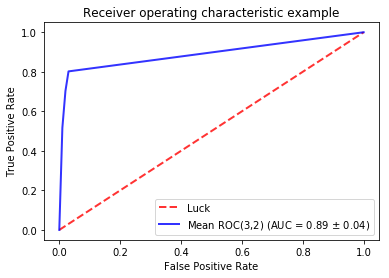

In [40]:
s_frame, e_frame = create_dataset_esc_stairs(sua_frame, sda_frame, eua_frame, eda_frame)
X,Y = create_stairs_esc_dataset(s_frame, e_frame)
cl1 = svm.SVC()
esmean_fpr32, esmean_tpr32, esmean_auc32, esstd_auc32 = compute_roc_params(X,Y,cl1)
plot_roc(esmean_fpr32, esmean_tpr32, esmean_auc32, esstd_auc32, '3,2')

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['acc_norm_x'] = window['accelerationX'].apply(lambda x: x-median_x)
/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['acc_norm_y'] = window['accelerationY'].apply(lambda x: x-median_y)
/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1

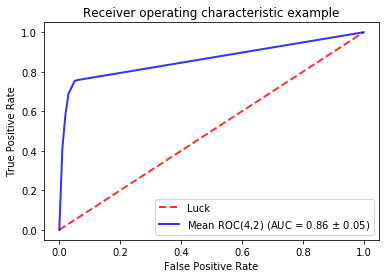

In [41]:
sua_frame, sda_frame, eua_frame, eda_frame, lua_frame, lda_frame, wa_frame = create_acc_features_from_files(2000, 4000, 
                               su_files = sua_files, sd_files = sda_files,
                               eu_files = eua_files, ed_files = eda_files,
                               lu_files = lua_files, ld_files = lda_files,
                                w_files = wa_files)
s_frame, e_frame = create_dataset_esc_stairs(sua_frame, sda_frame, eua_frame, eda_frame)
X,Y = create_stairs_esc_dataset(s_frame, e_frame)
cl1 = svm.SVC()
esmean_fpr42, esmean_tpr42, esmean_auc42, esstd_auc42 = compute_roc_params(X,Y,cl1)
plot_roc(esmean_fpr42, esmean_tpr42, esmean_auc42, esstd_auc42, '4,2')

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['acc_norm_x'] = window['accelerationX'].apply(lambda x: x-median_x)
/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['acc_norm_y'] = window['accelerationY'].apply(lambda x: x-median_y)
/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1

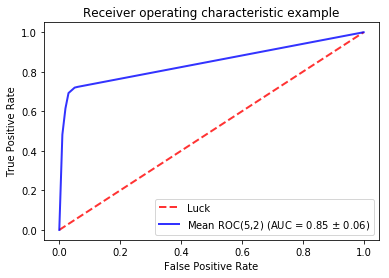

In [42]:
sua_frame, sda_frame, eua_frame, eda_frame, lua_frame, lda_frame, wa_frame = create_acc_features_from_files(2000, 5000, 
                               su_files = sua_files, sd_files = sda_files,
                               eu_files = eua_files, ed_files = eda_files,
                               lu_files = lua_files, ld_files = lda_files,
                                w_files = wa_files)
s_frame, e_frame = create_dataset_esc_stairs(sua_frame, sda_frame, eua_frame, eda_frame)
X,Y = create_stairs_esc_dataset(s_frame, e_frame)
cl1 = svm.SVC()
esmean_fpr52, esmean_tpr52, esmean_auc52, esstd_auc52 = compute_roc_params(X,Y,cl1)
plot_roc(esmean_fpr52, esmean_tpr52, esmean_auc52, esstd_auc52, '5,2')

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['acc_norm_x'] = window['accelerationX'].apply(lambda x: x-median_x)
/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['acc_norm_y'] = window['accelerationY'].apply(lambda x: x-median_y)
/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1

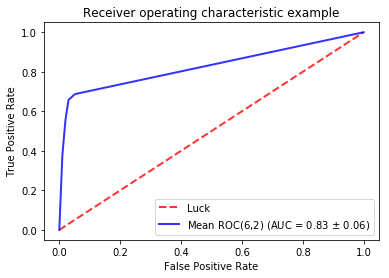

In [43]:
sua_frame, sda_frame, eua_frame, eda_frame, lua_frame, lda_frame, wa_frame = create_acc_features_from_files(2000, 6000, 
                               su_files = sua_files, sd_files = sda_files,
                               eu_files = eua_files, ed_files = eda_files,
                               lu_files = lua_files, ld_files = lda_files,
                                w_files = wa_files)
s_frame, e_frame = create_dataset_esc_stairs(sua_frame, sda_frame, eua_frame, eda_frame)
X,Y = create_stairs_esc_dataset(s_frame, e_frame)
cl1 = svm.SVC()
esmean_fpr62, esmean_tpr62, esmean_auc62, esstd_auc62 = compute_roc_params(X,Y,cl1)
plot_roc(esmean_fpr62, esmean_tpr62, esmean_auc62, esstd_auc62, '6,2')

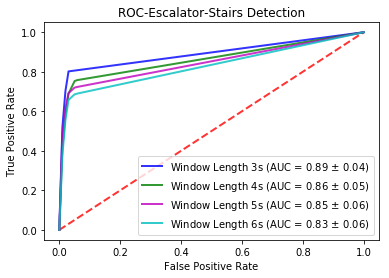

In [66]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             alpha=.8)
plt.plot(esmean_fpr32, esmean_tpr32, color='b',
             label=r'Window Length 3s (AUC = %0.2f $\pm$ %0.2f)' % (esmean_auc32, esstd_auc32),
             lw=2, alpha=.8)
plt.plot(esmean_fpr42, esmean_tpr42, color='g',
             label=r'Window Length 4s (AUC = %0.2f $\pm$ %0.2f)' % (esmean_auc42, esstd_auc42),
             lw=2, alpha=.8)
plt.plot(esmean_fpr52, esmean_tpr52, color='m',
             label=r'Window Length 5s (AUC = %0.2f $\pm$ %0.2f)' % (esmean_auc52, esstd_auc52),
             lw=2, alpha=.8)
plt.plot(esmean_fpr62, esmean_tpr62, color='c',
             label=r'Window Length 6s (AUC = %0.2f $\pm$ %0.2f)' % (esmean_auc62, esstd_auc62),
             lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Escalator-Stairs Detection')
# plt.legend()
plt.legend(loc="lower right")
plt.show()

In [46]:
print(esmean_fpr32, esmean_tpr32, esmean_auc32, esstd_auc32)
print(esmean_fpr42, esmean_tpr42, esmean_auc42, esstd_auc42)
print(esmean_fpr52, esmean_tpr52, esmean_auc52, esstd_auc52)
print(esmean_fpr62, esmean_tpr62, esmean_auc62, esstd_auc62)

[ 0.          0.01010101  0.02020202  0.03030303  0.04040404  0.05050505
  0.06060606  0.07070707  0.08080808  0.09090909  0.1010101   0.11111111
  0.12121212  0.13131313  0.14141414  0.15151515  0.16161616  0.17171717
  0.18181818  0.19191919  0.2020202   0.21212121  0.22222222  0.23232323
  0.24242424  0.25252525  0.26262626  0.27272727  0.28282828  0.29292929
  0.3030303   0.31313131  0.32323232  0.33333333  0.34343434  0.35353535
  0.36363636  0.37373737  0.38383838  0.39393939  0.4040404   0.41414141
  0.42424242  0.43434343  0.44444444  0.45454545  0.46464646  0.47474747
  0.48484848  0.49494949  0.50505051  0.51515152  0.52525253  0.53535354
  0.54545455  0.55555556  0.56565657  0.57575758  0.58585859  0.5959596
  0.60606061  0.61616162  0.62626263  0.63636364  0.64646465  0.65656566
  0.66666667  0.67676768  0.68686869  0.6969697   0.70707071  0.71717172
  0.72727273  0.73737374  0.74747475  0.75757576  0.76767677  0.77777778
  0.78787879  0.7979798   0.80808081  0.81818182  0.

In [47]:
print(dmean_fpr32, dmean_tpr32, dmean_auc32, dstd_auc32)
print(dmean_fpr42, dmean_tpr42, dmean_auc42, dstd_auc42)
print(dmean_fpr52, dmean_tpr52, dmean_auc52, dstd_auc52)
print(dmean_fpr62, dmean_tpr62, dmean_auc62, dstd_auc62)

[ 0.          0.01010101  0.02020202  0.03030303  0.04040404  0.05050505
  0.06060606  0.07070707  0.08080808  0.09090909  0.1010101   0.11111111
  0.12121212  0.13131313  0.14141414  0.15151515  0.16161616  0.17171717
  0.18181818  0.19191919  0.2020202   0.21212121  0.22222222  0.23232323
  0.24242424  0.25252525  0.26262626  0.27272727  0.28282828  0.29292929
  0.3030303   0.31313131  0.32323232  0.33333333  0.34343434  0.35353535
  0.36363636  0.37373737  0.38383838  0.39393939  0.4040404   0.41414141
  0.42424242  0.43434343  0.44444444  0.45454545  0.46464646  0.47474747
  0.48484848  0.49494949  0.50505051  0.51515152  0.52525253  0.53535354
  0.54545455  0.55555556  0.56565657  0.57575758  0.58585859  0.5959596
  0.60606061  0.61616162  0.62626263  0.63636364  0.64646465  0.65656566
  0.66666667  0.67676768  0.68686869  0.6969697   0.70707071  0.71717172
  0.72727273  0.73737374  0.74747475  0.75757576  0.76767677  0.77777778
  0.78787879  0.7979798   0.80808081  0.81818182  0.

In [34]:
display(sua_frame)

,skewX,percentileX,iqrX,kurtosisX,std_deviationX,derivativeX,normX,skewY,percentileY,iqrY,...,skewZ,percentileZ,iqrZ,kurtosisZ,std_deviationZ,derivativeZ,normZ,ts_max,ts_min,label
0,1.088439,0.024636,1.555932,2.233412,1.336217,-0.028144,11.238383,0.061817,0.109095,1.588254,...,0.722186,0.096478,3.869030,-0.203856,2.846231,-0.566799,74.715856,1519392523392,1519392520399,1
1,-0.269384,0.001311,0.909797,0.522834,0.776892,-0.037182,-5.094861,0.022311,0.138462,2.066196,...,0.453148,0.127001,4.710592,-0.992896,2.652083,-0.366972,32.574301,1519392524294,1519392522404,1
2,0.054773,-0.569318,0.360926,-1.500000,0.294793,0.005631,0.032322,0.043507,0.551712,1.700482,...,0.665133,0.462238,2.332551,-1.500000,2.074982,0.034785,3.494338,1519392527342,1519392526116,1
3,-1.076650,-0.405436,0.168791,-0.227405,0.356888,0.010009,-0.246603,0.389715,0.421880,2.066196,...,0.552430,0.328991,4.079720,-1.463246,2.614081,0.030681,8.810663,1519392529128,1519392527124,1
4,0.702619,-0.327740,0.872687,-0.895341,0.738739,0.019549,1.319205,0.194611,0.406203,1.413776,...,-1.458619,0.486677,0.581792,0.190266,2.163883,0.036787,-5.881357,1519392531365,1519392529128,1
5,1.160655,0.203450,0.985214,0.262334,1.669037,0.016192,1.195904,0.729833,0.366455,1.597531,...,0.276508,0.376979,3.652654,-0.947745,2.916724,-0.016754,-0.611719,1519392533165,1519392531137,1
6,-0.578709,0.630443,1.719037,-1.500000,1.478431,-0.004271,-1.970428,0.255388,0.510960,1.758541,...,-0.209841,0.557934,4.674080,-1.500000,3.835699,0.007993,-1.631648,1519392535125,1519392533165,1
7,-0.399200,0.430898,2.849100,-0.717560,3.742180,-0.019794,-2.415751,1.325361,-0.431216,1.109712,...,-0.498761,0.481409,2.220622,-1.194463,1.715350,0.032312,-3.739743,1519392537284,1519392535125,1
8,0.970457,0.094689,5.250484,-0.780892,5.010170,-0.089604,16.545130,-0.928396,0.159558,6.706159,...,0.380112,0.241560,4.202422,-1.748245,2.269954,0.017593,12.848481,1519392539325,1519392537125,1
9,-0.465791,0.412590,1.142034,-1.413052,0.683499,-0.070076,-2.123657,0.221771,0.384816,1.927332,...,0.565516,0.293426,7.241263,-1.164083,5.460674,-0.135535,7.802707,1519392541324,1519392538456,1


In [39]:
display(s_frame)

,skewX,percentileX,iqrX,kurtosisX,std_deviationX,derivativeX,normX,skewY,percentileY,iqrY,...,percentileZ,iqrZ,kurtosisZ,std_deviationZ,derivativeZ,normZ,ts_max,ts_min,label,label_es
0,1.088439,0.024636,1.555932,2.233412,1.336217,-0.028144,11.238383,0.061817,0.109095,1.588254,...,0.096478,3.869030,-0.203856,2.846231,-0.566799,74.715856,1519392523392,1519392520399,1,0
1,-0.269384,0.001311,0.909797,0.522834,0.776892,-0.037182,-5.094861,0.022311,0.138462,2.066196,...,0.127001,4.710592,-0.992896,2.652083,-0.366972,32.574301,1519392524294,1519392522404,1,0
2,0.054773,-0.569318,0.360926,-1.500000,0.294793,0.005631,0.032322,0.043507,0.551712,1.700482,...,0.462238,2.332551,-1.500000,2.074982,0.034785,3.494338,1519392527342,1519392526116,1,0
3,-1.076650,-0.405436,0.168791,-0.227405,0.356888,0.010009,-0.246603,0.389715,0.421880,2.066196,...,0.328991,4.079720,-1.463246,2.614081,0.030681,8.810663,1519392529128,1519392527124,1,0
4,0.702619,-0.327740,0.872687,-0.895341,0.738739,0.019549,1.319205,0.194611,0.406203,1.413776,...,0.486677,0.581792,0.190266,2.163883,0.036787,-5.881357,1519392531365,1519392529128,1,0
5,1.160655,0.203450,0.985214,0.262334,1.669037,0.016192,1.195904,0.729833,0.366455,1.597531,...,0.376979,3.652654,-0.947745,2.916724,-0.016754,-0.611719,1519392533165,1519392531137,1,0
6,-0.578709,0.630443,1.719037,-1.500000,1.478431,-0.004271,-1.970428,0.255388,0.510960,1.758541,...,0.557934,4.674080,-1.500000,3.835699,0.007993,-1.631648,1519392535125,1519392533165,1,0
7,-0.399200,0.430898,2.849100,-0.717560,3.742180,-0.019794,-2.415751,1.325361,-0.431216,1.109712,...,0.481409,2.220622,-1.194463,1.715350,0.032312,-3.739743,1519392537284,1519392535125,1,0
8,0.970457,0.094689,5.250484,-0.780892,5.010170,-0.089604,16.545130,-0.928396,0.159558,6.706159,...,0.241560,4.202422,-1.748245,2.269954,0.017593,12.848481,1519392539325,1519392537125,1,0
9,-0.465791,0.412590,1.142034,-1.413052,0.683499,-0.070076,-2.123657,0.221771,0.384816,1.927332,...,0.293426,7.241263,-1.164083,5.460674,-0.135535,7.802707,1519392541324,1519392538456,1,0


In [29]:
def create_acc_features_from_files(sliding_window_interval, window_interval, 
                               su_files = climbing_files_acc, sd_files = downstairs_files_acc,
                               eu_files = escalator_up_files_acc, ed_files = escalator_down_files_acc,
                               lu_files = lift_up_files_acc, ld_files = lift_down_files_acc, w_files = walking_files_acc):
    su_frame = create_acc_data_frame(su_files, sliding_window_interval, window_interval)
    su_frame['label'] = 1
    sd_frame = create_acc_data_frame(sd_files, sliding_window_interval, window_interval)
    sd_frame['label'] = 2
    eu_frame = create_acc_data_frame(eu_files, sliding_window_interval, window_interval)
    eu_frame['label'] = 3
    ed_frame = create_acc_data_frame(ed_files, sliding_window_interval, window_interval)
    ed_frame['label'] = 4
    lu_frame = create_acc_data_frame(lu_files, sliding_window_interval, window_interval)
    lu_frame['label'] = 5
    ld_frame = create_acc_data_frame(ld_files, sliding_window_interval, window_interval)
    ld_frame['label'] = 6
    w_frame = create_acc_data_frame(w_files, sliding_window_interval, window_interval)
    w_frame['label'] = 0
    return su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame, w_frame
    

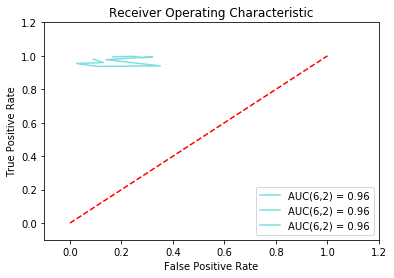

In [33]:
plt.title('Receiver Operating Characteristic')
# plt.plot(false_positive_rate_32, true_positive_rate_32, 'm',alpha=0.5, label='AUC(3,2) = %0.2f'% roc_auc_32)
# plt.plot(false_positive_rate, true_positive_rate, 'b', alpha=0.5, label='AUC(4,2) = %0.2f'% roc_auc)
# plt.plot(false_positive_rate_52, true_positive_rate_52, 'g',alpha=0.5, label='AUC(5,2) = %0.2f'% roc_auc_52)
plt.plot(fpr62, tpr62, 'c',alpha=0.5, label='AUC(6,2) = %0.2f'% max(auc62))
mean_tpr = np.mean(tpr62, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc62)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

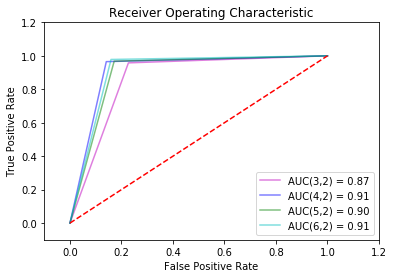

In [31]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_32, true_positive_rate_32, 'm',alpha=0.5, label='AUC(3,2) = %0.2f'% roc_auc_32)
plt.plot(false_positive_rate, true_positive_rate, 'b', alpha=0.5, label='AUC(4,2) = %0.2f'% roc_auc)
plt.plot(false_positive_rate_52, true_positive_rate_52, 'g',alpha=0.5, label='AUC(5,2) = %0.2f'% roc_auc_52)
plt.plot(false_positive_rate_62, true_positive_rate_62, 'c',alpha=0.5, label='AUC(6,2) = %0.2f'% roc_auc_62)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr= roc_curve(y_test[:, i], y_score[:, i])
roc_auc[i] = auc(fpr[i], tpr[i])

IndexError: too many indices for array

In [19]:
from sklearn.feature_selection  import SelectKBest

In [22]:
clf = RandomForestClassifier().fit(X_train, y_train)

In [24]:
clf.feature_importances_.argsort()[::-1]

array([4, 2, 1, 5, 3, 6, 0])

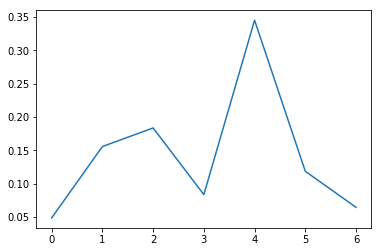

In [27]:
plt.plot(clf.feature_importances_)

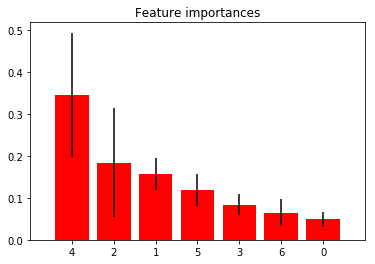

In [35]:
# Plot the feature importances of the forest
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[0]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[0]), indices)
plt.xlim([-1, X.shape[0]])
plt.show()

In [67]:
# Plot the feature importances of the forest
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[0]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[0]), indices)
plt.xlim([-1, X.shape[0]])
plt.show()

NameError: name 'clf' is not defined

In [29]:
X.shape

(7,)

In [23]:
SelectKBest.fit(clf, X,Y)

AttributeError: 'RandomForestClassifier' object has no attribute 'score_func'

In [37]:
ypred = clf.predict(X_test)

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred)

0.8559156677498726

In [40]:
from sklearn.metrics import roc_curve

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)

In [46]:
%matplotlib inline 
plt.figure()
lw = 0
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

KeyError: 0

In [48]:
X, Y

(array([[  1.22962652e+00,   1.68451815e-02,   1.27132111e+00, ...,
           2.74704725e+00,  -6.80343982e-01,   8.06044061e+01],
        [ -1.39188386e-01,  -2.22043813e-02,   9.92396601e-01, ...,
           2.68301446e+00,  -3.48414501e-01,   6.19787083e+01],
        [  1.52766643e+00,  -3.17727772e-01,   3.64217937e-01, ...,
           2.93457649e+00,   2.49809934e-02,   4.03303337e+00],
        ..., 
        [ -2.18881454e+00,   7.30645059e-02,   1.63703546e-01, ...,
           6.30408021e-01,  -2.68537206e-02,   1.71207428e-01],
        [ -1.66680528e+00,   8.26613707e-02,   2.75333203e-01, ...,
           8.64047807e-01,  -2.46672044e-02,  -4.84827995e-01],
        [ -1.30708552e+00,   1.70646577e-02,   5.17147564e-01, ...,
           1.84293688e+00,  -7.96808216e-02,  -1.76213312e+00]]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [49]:
X.shape, Y.shape

((809, 21), (809,))

In [55]:
Y = label_binarize(Y, classes=[0, 1])
n_classes = Y.shape[1]

In [56]:
print(n_classes)
Y.shape

1


(809, 1)

In [58]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [57]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

MemoryError: 

In [68]:
w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame = create_features_from_files(2000, 5000)
print_characteristics(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
walking_frame, vertical_frame = create_dataset_vertical_transition(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X, Y = create_vertical_transition_dataset(walking_frame, vertical_frame)

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['pressure_norm'] = window['pressure'].apply(lambda x: x-median)


Walking Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.107373,0.188982,0.015076,-0.156572,0.012485,0.000172,0.036621,1511792578841,1511792573982,0
1,-0.121330,0.192445,0.022705,-0.878625,0.015277,-0.000182,-0.138672,1511792580824,1511792576142,0
2,1.162256,0.192446,0.014282,0.662948,0.014559,-0.000063,0.119141,1511792582803,1511792578124,0
3,-0.683964,0.188977,0.013367,0.373061,0.009623,-0.000292,-0.043213,1511792584964,1511792580102,0
4,-0.144504,0.188976,0.019775,-0.742690,0.014611,0.000051,0.001953,1511792586944,1511792582082,0


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
770,-0.037640,0.152496,0.016418,-0.972756,0.009880,0.000081,0.060913,1515342450597,1515342445810,0
771,-0.248094,0.162218,0.016083,-0.803781,0.010232,0.000035,0.009094,1515342452690,1515342447810,0
772,-0.186091,0.169028,0.012207,-0.843892,0.007267,0.000130,-0.021240,1515342454085,1515342449798,0
773,0.069523,0.229413,0.011353,-1.199488,0.006437,0.000206,-0.002747,1515342454085,1515342451892,0
774,0.595170,0.577350,0.000610,-1.500000,0.000527,-0.000014,0.000732,1515342454085,1515342453787,0


Stairs Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.058054,0.277353,0.249268,-1.535585,0.125822,-0.002033,-0.144531,1511794109427,1511794107260,1
1,0.064036,0.188985,0.123108,-1.384959,0.066970,-0.001137,-0.350586,1511794138577,1511794133719,1
2,0.430553,0.199984,0.061768,-0.752603,0.049941,-0.000997,0.099121,1511794140197,1511794135876,1
3,-0.196613,0.267249,0.040527,-1.106622,0.024263,-0.000451,-0.028564,1511794140197,1511794137856,1
4,-0.628156,0.577345,0.007202,-1.500000,0.006294,-0.000122,-0.009521,1511794140197,1511794139837,1


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
740,-0.047795,0.182560,0.075836,-1.114025,0.042294,-0.000960,-0.008301,1517762564782,1517762559977,1
741,0.272678,0.196106,0.059494,-1.171566,0.034840,-0.000747,0.257141,1517762566876,1517762561963,1
742,0.152853,0.192440,0.052948,-0.903260,0.031186,-0.000860,-0.106018,1517762568764,1517762563968,1
743,-0.010833,0.242525,0.031555,-0.879498,0.021997,-0.000523,0.007629,1517762569158,1517762566168,1
744,-0.414442,0.377957,0.016846,-1.095433,0.011272,-0.000177,0.003906,1517762569158,1517762567956,1


Stairs Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.754598,0.188984,0.035461,0.189830,0.034262,0.000896,-0.202881,1511794299307,1511794294448,2
1,0.747196,0.199989,0.055908,-0.535929,0.039307,0.000766,0.270508,1511794300931,1511794296608,2
2,0.456631,0.267249,0.053101,-0.996965,0.032449,0.000467,0.087402,1511794300931,1511794298587,2
3,-0.544685,0.577343,0.010742,-1.500000,0.009162,0.000138,-0.011230,1511794300931,1511794300568,2
4,-0.137322,0.192450,0.118530,-1.562760,0.061057,0.000980,0.002197,1511794327095,1511794322409,2


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
738,-0.023819,0.158096,0.098297,-1.168045,0.059717,0.001777,0.137024,1517762682254,1517762677467,2
739,-0.415858,0.152483,0.097137,-1.257042,0.053311,0.001143,-0.511597,1517762684359,1517762679382,2
740,-1.226274,0.152489,0.014771,0.574951,0.021933,0.000659,-0.325195,1517762686269,1517762681471,2
741,1.092082,0.182571,0.008972,0.004800,0.011127,0.000167,0.107971,1517762686754,1517762683458,2
742,0.154986,0.267256,0.021561,-1.413095,0.011880,0.000230,0.033691,1517762686754,1517762685367,2


Escalator Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.012907,0.142856,0.047913,-1.053583,0.027685,-0.001302,0.508972,1513098441658,1513098436667,3
1,-1.033353,0.141403,0.062531,0.178219,0.047132,-0.002042,-1.069763,1513098443656,1513098438681,3
2,-0.201755,0.147423,0.128769,-1.429332,0.075527,-0.002313,-1.076355,1513098445549,1513098440761,3
3,0.323838,0.174061,0.078369,-0.875610,0.060281,-0.001800,0.055115,1513098447047,1513098442755,3
4,-0.335066,0.218200,0.050720,-0.838852,0.040145,-0.000656,-0.040833,1513098449634,1513098444751,3


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
755,-0.134905,0.147429,0.106903,-1.574416,0.050771,-0.001374,-0.237122,1517591984684,1517591979821,3
756,0.669952,0.144328,0.046173,-0.401981,0.040912,-0.001472,0.119995,1517591986675,1517591981817,3
757,-0.759050,0.152484,0.045380,-0.426287,0.039962,-0.001210,-0.718445,1517591988654,1517591983793,3
758,-0.197195,0.196105,0.061676,-1.386538,0.037001,-0.000948,-0.214783,1517591989051,1517591985781,3
759,0.548370,0.316223,0.020721,-1.152427,0.013463,-0.000386,0.029541,1517591989051,1517591987762,3


Escalator Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.113943,0.188984,0.066345,-1.464870,0.034294,0.000420,-0.265381,1512574185772,1512574180915,4
1,0.791335,0.192440,0.038940,0.010388,0.034286,0.000809,0.145020,1512574187753,1512574183074,4
2,0.008915,0.188970,0.080261,-1.376055,0.043899,0.000847,-0.291260,1512574189913,1512574185053,4
3,0.018883,0.188966,0.072510,-1.139584,0.044193,0.000908,0.387939,1512574191891,1512574187033,4
4,-0.078098,0.188964,0.075562,-0.973332,0.051720,0.001026,0.311279,1512574193872,1512574189011,4


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
741,-0.021824,0.160119,0.027252,-0.484672,0.027263,0.000778,-0.097778,1517739882830,1517739878361,4
742,0.006243,0.142850,0.061646,-1.562571,0.032072,0.000751,-0.295105,1517739884821,1517739879851,4
743,-0.312604,0.140019,0.028198,-0.119372,0.025393,0.001094,-0.148010,1517739886802,1517739881835,4
744,0.684228,0.179602,0.026947,-1.001605,0.016305,0.000325,0.162842,1517739886917,1517739883940,4
745,-0.727842,0.301505,0.012939,-0.697778,0.009941,0.000333,-0.043091,1517739886917,1517739885909,4


Lift Up Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,-0.194864,0.145866,0.198425,-1.174880,0.116570,-0.003402,-0.177551,1513240690732,1513240685732,5
1,-0.941582,0.166603,0.171600,-0.549411,0.177508,-0.003775,-2.518860,1513240692712,1513240688032,5
2,0.229627,0.192387,0.375702,-1.447795,0.198044,-0.003324,1.649231,1513240694695,1513240689828,5
3,-0.533129,0.204058,0.220764,-0.707004,0.145900,-0.003001,-0.811401,1513240696402,1513240692008,5
4,-0.641487,0.277257,0.266724,-0.962146,0.166869,-0.001568,-0.959900,1513240698386,1513240694396,5


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
245,-0.281551,0.141425,0.325516,-1.397991,0.169246,-0.005056,-1.368408,1517742601484,1517742596505,5
246,-0.083111,0.144284,0.369080,-1.196672,0.205542,-0.006803,-1.172546,1517742603479,1517742598596,5
247,0.438073,0.149040,0.327759,-1.244850,0.169539,-0.005006,1.192383,1517742605069,1517742600590,5
248,0.747088,0.196101,0.095993,-0.872499,0.067266,-0.002173,0.774292,1517742605069,1517742602580,5
249,0.240351,0.408246,0.010162,-1.641280,0.005865,-0.000181,0.006958,1517742605069,1517742604573,5


Lift Down Frame


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
0,0.089463,0.162221,0.192184,-1.112721,0.118123,0.002376,0.152405,1513693874470,1513693869500,6
1,0.062211,0.168999,0.190430,-1.253495,0.121794,0.002610,-0.059875,1513693876468,1513693871700,6
2,0.015479,0.171463,0.189423,-1.181054,0.120256,0.002610,0.154480,1513693878451,1513693873679,6
3,-0.074938,0.168994,0.228973,-1.249953,0.125236,0.002711,-0.206299,1513693880344,1513693875575,6
4,-0.043742,0.171463,0.165344,-0.983914,0.112503,0.002773,0.007874,1513693882330,1513693877558,6


,skew,percentile,iqr,kurtosis,std_deviation,derivative,norm,ts_max,ts_min,label
230,0.366239,0.140023,0.279114,-1.327727,0.142021,0.004634,1.615112,1517742580702,1517742575711,6
231,0.092553,0.139984,0.309357,-1.172061,0.185556,0.006397,1.173462,1517742582693,1517742577712,6
232,-0.297539,0.141379,0.300934,-1.299878,0.167001,0.005158,-1.733459,1517742584691,1517742579805,6
233,-0.425482,0.176747,0.139557,-1.076135,0.078653,0.002686,-0.498840,1517742584879,1517742581802,6
234,-0.268848,0.288667,0.024002,-1.276984,0.016339,0.000476,-0.033203,1517742584879,1517742583793,6


In [73]:
X, Y

(array([[  1.07373239e-01,   1.88981980e-01,   1.50756836e-02, ...,
           1.24847582e-02,   1.72096700e-04,   3.66210938e-02],
        [ -1.21330446e-01,   1.92444529e-01,   2.27050781e-02, ...,
           1.52767337e-02,  -1.81608877e-04,  -1.38671875e-01],
        [  1.16225558e+00,   1.92446335e-01,   1.42822266e-02, ...,
           1.45589361e-02,  -6.34828268e-05,   1.19140625e-01],
        ..., 
        [ -2.97539398e-01,   1.41379290e-01,   3.00933838e-01, ...,
           1.67001335e-01,   5.15775914e-03,  -1.73345947e+00],
        [ -4.25481949e-01,   1.76746818e-01,   1.39556885e-01, ...,
           7.86532630e-02,   2.68629113e-03,  -4.98840332e-01],
        [ -2.68847974e-01,   2.88666701e-01,   2.40020752e-02, ...,
           1.63391891e-02,   4.75738343e-04,  -3.32031250e-02]]),
 array([ 0.,  0.,  0., ...,  1.,  1.,  1.]))

In [71]:
clf = RandomForestClassifier().fit(X, Y)

In [74]:
importances

array([ 0.04649064,  0.16365991,  0.17309128,  0.07636306,  0.28058014,
        0.20436845,  0.05544651])

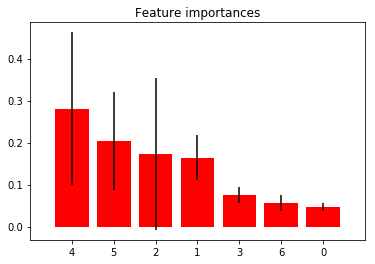

In [80]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

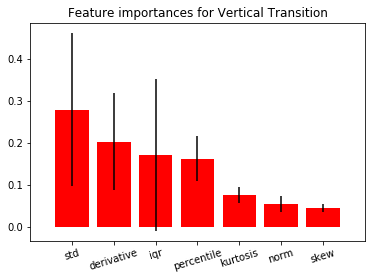

In [85]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances for Vertical Transition")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ("std","derivative","iqr","percentile","kurtosis","norm","skew"), rotation=17)
plt.xlim([-1, X.shape[1]])
plt.show()

In [86]:
walking_frame, vertical_frame = create_dataset_vertical_2(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X1, Y1 = create_vertical_v2_dataset(walking_frame, vertical_frame)
up_frame, down_frame = create_dataset_direction(w_frame, su_frame, sd_frame, eu_frame, ed_frame, lu_frame, ld_frame)
X2, Y2 = create_direction_dataset(up_frame, down_frame)

In [108]:
clf1 = RandomForestClassifier().fit(X1, Y1)
clf2 = RandomForestClassifier().fit(X2, Y2)

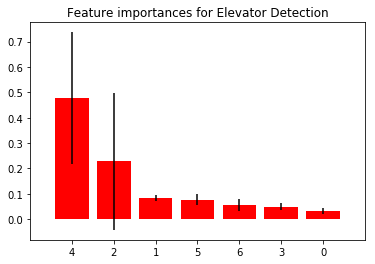

[ 0.01166685  0.01157493  0.26970297  0.01450059  0.2592525   0.02030983
  0.02279534] [ 0.03130415  0.08199666  0.227279    0.04917379  0.4774309   0.0770312
  0.0557843 ]


In [101]:
importances = clf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances for Elevator Detection")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
print(std, importances)

In [102]:
a = [tree.feature_importances_ for tree in clf1.estimators_]
np.std(a, axis=0)

array([ 0.01166685,  0.01157493,  0.26970297,  0.01450059,  0.2592525 ,
        0.02030983,  0.02279534])

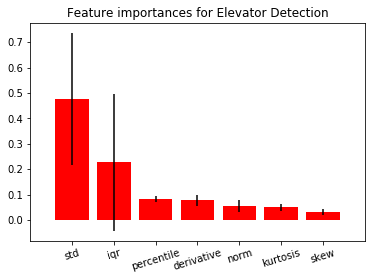

In [95]:
importances = clf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances for Elevator Detection")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ("std","iqr","percentile","derivative","norm","kurtosis","skew"), rotation=17)
plt.xlim([-1, X.shape[1]])
plt.show()

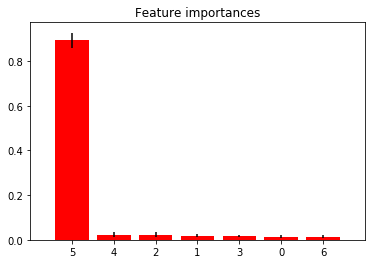

In [93]:
importances = clf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

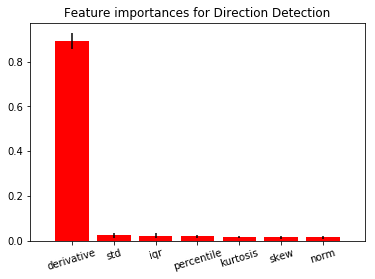

In [96]:
importances = clf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances for Direction Detection")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ("derivative","std","iqr","percentile","kurtosis","skew", "norm"), rotation=17)
plt.xlim([-1, X.shape[1]])
plt.show()

In [103]:
sua_frame, sda_frame, eua_frame, eda_frame, lua_frame, lda_frame, wa_frame = create_acc_features_from_files(2000, 5000, 
                               su_files = sua_files, sd_files = sda_files,
                               eu_files = eua_files, ed_files = eda_files,
                               lu_files = lua_files, ld_files = lda_files,
                                w_files = wa_files)
s_frame, e_frame = create_dataset_esc_stairs(sua_frame, sda_frame, eua_frame, eda_frame)
X3,Y3 = create_stairs_esc_dataset(s_frame, e_frame)

/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['acc_norm_x'] = window['accelerationX'].apply(lambda x: x-median_x)
/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  window['acc_norm_y'] = window['accelerationY'].apply(lambda x: x-median_y)
/home/nithishr/python-projects/activity_recognition/activity_detection/utils_processing/utils.py:1

In [113]:
X3.shape, Y3.shape

((809, 21), (809,))

In [114]:
X4 = X3[:,:7]
X4.shape

(809, 7)

In [115]:
clf3 = RandomForestClassifier().fit(X3[:,:7], Y3)

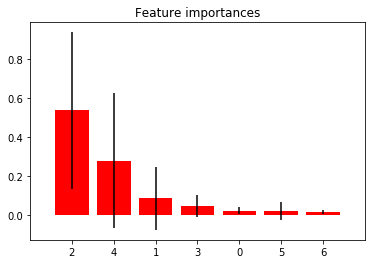

In [116]:
importances = clf3.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

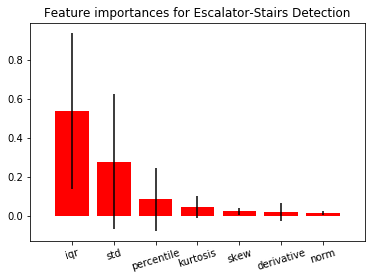

In [117]:
importances = clf3.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances for Escalator-Stairs Detection")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ("iqr","std","percentile","kurtosis","skew","derivative","norm"), rotation=17)
plt.xlim([-1, X.shape[1]])
plt.show()

In [110]:
importances

array([  1.72703663e-03,   4.45521342e-03,   1.79000024e-01,
         4.47904165e-03,   8.89115631e-02,   1.52091092e-03,
         0.00000000e+00,   6.65787850e-04,   8.87457896e-03,
         4.15145480e-02,   9.95271024e-04,   3.48548717e-01,
         4.12364618e-04,   5.03908866e-02,   3.51166969e-03,
         2.26727947e-03,   1.40162199e-01,   1.13369370e-02,
         1.07165171e-01,   3.43791018e-04,   3.71700805e-03])

In [109]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      